Dataset for the coursework: Indicators of Heart Disease (2022 UPDATE)
Dataset available at: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

##Import


In [ ]:
#Install category encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
#Import libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno
from sklearn import model_selection, preprocessing, metrics #splitting the dataset, preprocessing and metrics
from sklearn.impute import SimpleImputer #Import imputer
import copy #Copy datasets
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler #Standard scaler
from imblearn.under_sampling import RandomUnderSampler #Random under sampler
from imblearn.under_sampling import TomekLinks #Tomek links under sampler

#Encoders
from sklearn.preprocessing import LabelEncoder #Label encoder
from category_encoders import OneHotEncoder, OrdinalEncoder #One hot and ordinal encoder

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Import files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Create dataframe
df_heart_2022 = pd.read_csv('/content/drive/MyDrive/CMP7161/datasets/heart_2022.csv')
df_heart_2022.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


###Remove duplicate and multiple missing values (more than 4)

####Remove missing values (more than 4 in a row)

In [ ]:
#Get missing values per row
missing_values = df_heart_2022.isnull().sum(axis=1)

In [ ]:
#Exclude rows that have more than 4 missing records
df_heart_2022 = df_heart_2022[missing_values <= 4]

In [ ]:
#View missing values after the bulk cleaning
df_heart_2022.isna().sum()

State                            0
Sex                              0
GeneralHealth                  752
PhysicalHealthDays            8082
MentalHealthDays              6505
LastCheckupTime               6184
PhysicalActivities             651
SleepHours                    3703
RemovedTeeth                  8436
HadHeartAttack                1980
HadAngina                     3200
HadStroke                      923
HadAsthma                     1125
HadSkinCancer                 2313
HadCOPD                       1375
HadDepressiveDisorder         1792
HadKidneyDisease              1213
HadArthritis                  1776
HadDiabetes                    559
DeafOrHardOfHearing           1127
BlindOrVisionDifficulty        903
DifficultyConcentrating       2089
DifficultyWalking             1080
DifficultyDressingBathing      396
DifficultyErrands              891
SmokerStatus                  2380
ECigaretteUsage               1125
ChestScan                    15524
RaceEthnicityCategor

####Remove duplicate rows

In [ ]:
#Check duplicates
df_heart_2022.duplicated().sum()

11

In [ ]:
#Remove duplicates
df_heart_2022.drop_duplicates(inplace=True)

In [ ]:
#Check duplicates
df_heart_2022.duplicated().sum()

0

##Split of the dataset

In [ ]:
#Splitting the dataset into training and testing datasets
#Target variable: HadHeartAttack
X_train, X_test, Y_train, Y_test =   model_selection.train_test_split(df_heart_2022.drop(labels=["HadHeartAttack"], axis='columns'),
                                   df_heart_2022["HadHeartAttack"], random_state=42)

In [ ]:
#Features
X_train.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
35294,California,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.73,97.98,32.84,No,NaN,No,Yes,NaN,No,Yes
213981,Missouri,Female,Fair,15.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.55,60.78,25.32,No,No,Yes,Yes,"Yes, received Tdap",No,No
204839,Minnesota,Male,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,No,6.0,None of them,No,...,1.68,133.36,47.45,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
5447,Alaska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.75,90.72,29.53,Yes,Yes,Yes,No,NaN,No,Yes
404789,Washington,Female,Good,6.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,"6 or more, but not all",No,...,1.65,56.70,20.80,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Tested positive using home test without a heal...


In [ ]:
#Target
Y_train.head()

35294     No
213981    No
204839    No
5447      No
404789    No
Name: HadHeartAttack, dtype: object

##Exploratory Data Analysis

###Data types overview

In [ ]:
#View the Data Types (Train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295369 entries, 35294 to 138818
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      295369 non-null  object 
 1   Sex                        295369 non-null  object 
 2   GeneralHealth              294788 non-null  object 
 3   PhysicalHealthDays         289347 non-null  float64
 4   MentalHealthDays           290469 non-null  float64
 5   LastCheckupTime            290738 non-null  object 
 6   PhysicalActivities         294871 non-null  object 
 7   SleepHours                 292585 non-null  float64
 8   RemovedTeeth               289080 non-null  object 
 9   HadAngina                  292984 non-null  object 
 10  HadStroke                  294681 non-null  object 
 11  HadAsthma                  294556 non-null  object 
 12  HadSkinCancer              293662 non-null  object 
 13  HadCOPD                    294

In [ ]:
#View the Data Types (Train)
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 295369 entries, 35294 to 138818
Series name: HadHeartAttack
Non-Null Count   Dtype 
--------------   ----- 
293881 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


###Missing values (NaN)

In [ ]:
#View missing values (Train)
X_train.isna().sum()

State                            0
Sex                              0
GeneralHealth                  581
PhysicalHealthDays            6022
MentalHealthDays              4900
LastCheckupTime               4631
PhysicalActivities             498
SleepHours                    2784
RemovedTeeth                  6289
HadAngina                     2385
HadStroke                      688
HadAsthma                      813
HadSkinCancer                 1707
HadCOPD                       1030
HadDepressiveDisorder         1350
HadKidneyDisease               906
HadArthritis                  1311
HadDiabetes                    413
DeafOrHardOfHearing            846
BlindOrVisionDifficulty        666
DifficultyConcentrating       1556
DifficultyWalking              818
DifficultyDressingBathing      296
DifficultyErrands              681
SmokerStatus                  1759
ECigaretteUsage                870
ChestScan                    11609
RaceEthnicityCategory         7444
AgeCategory         

In [ ]:
#View missing values (Test)
Y_train.isna().sum()

1488

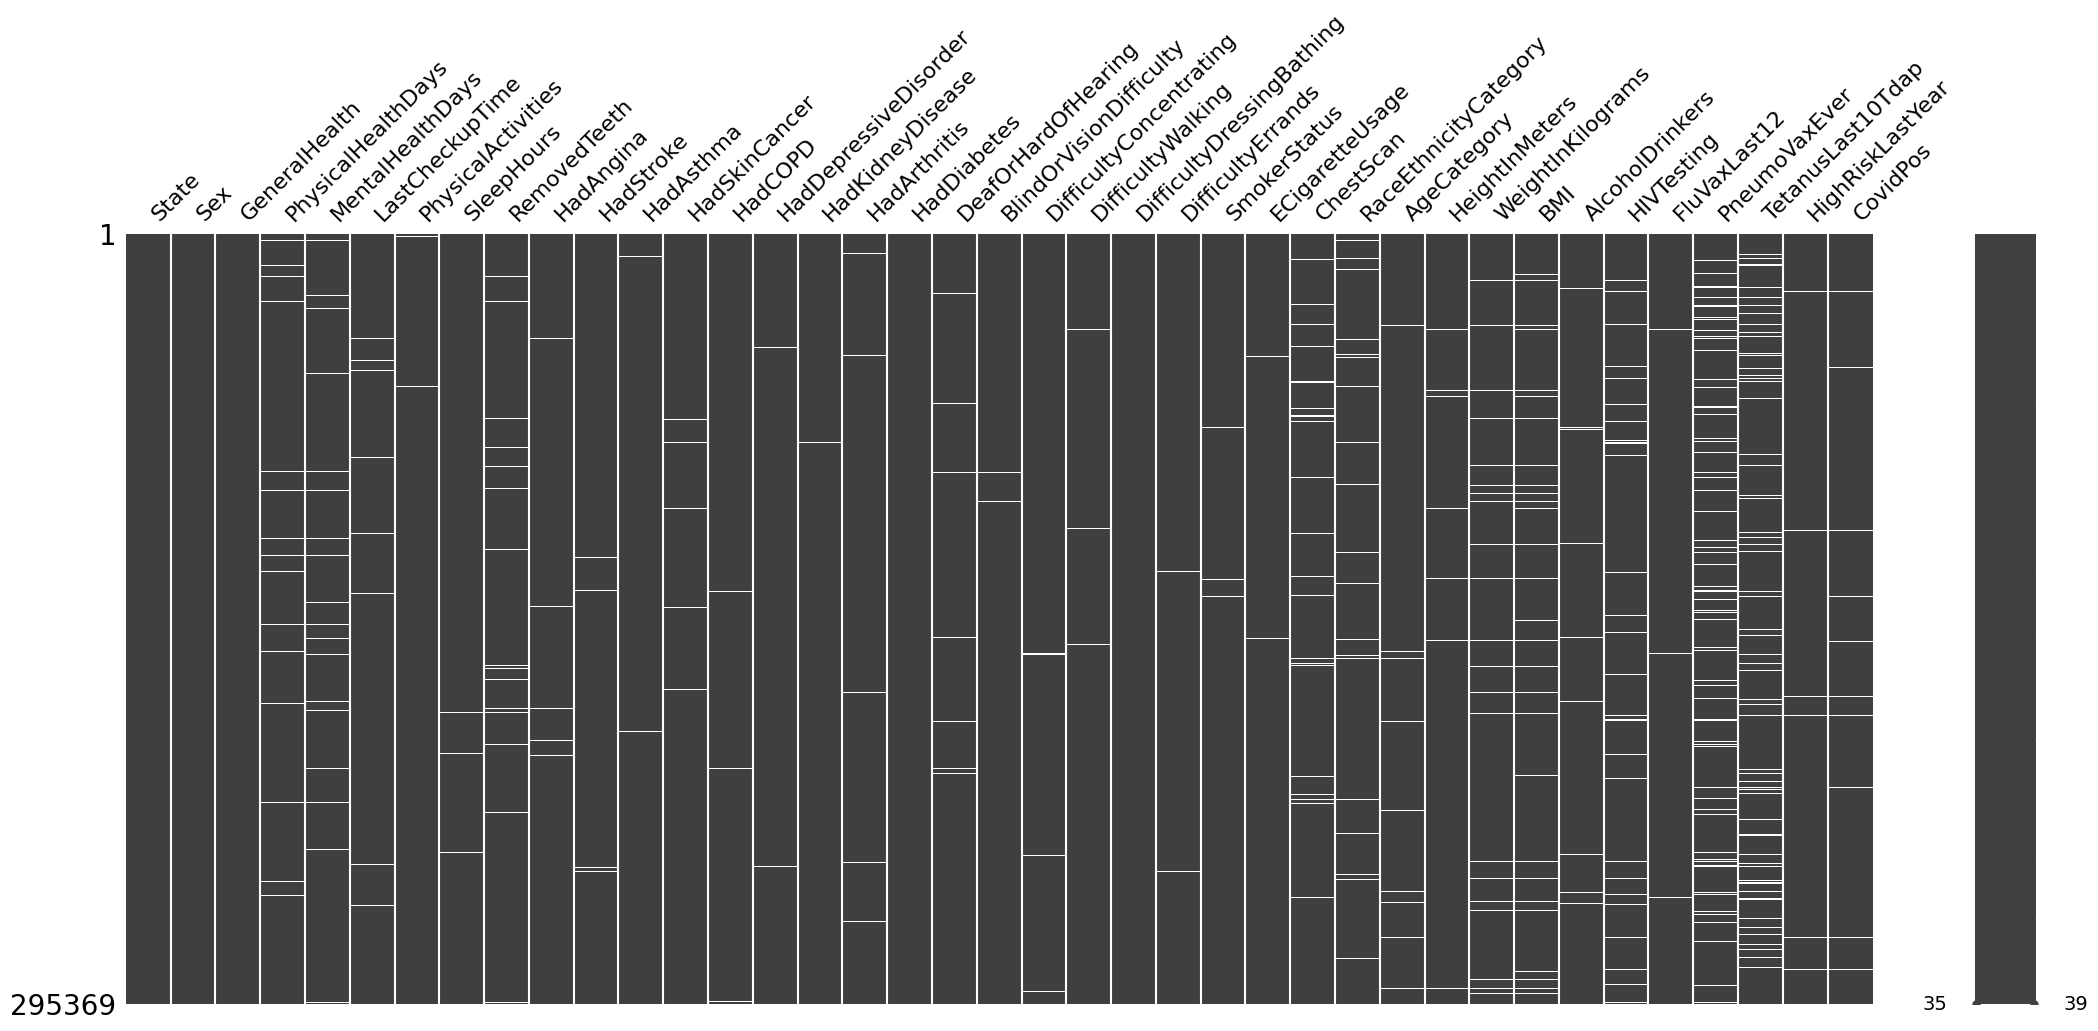

In [ ]:
#Visualise missing values
msno.matrix(X_train);

*italicized text*###Duplicate rows

In [ ]:
#Check duplicates
X_train.duplicated().sum()

0

###Univariate analysis

####State

In [ ]:
#Check the occurrence of the values
X_train['State'].value_counts()

State
Washington              17511
New York                11269
Minnesota               11005
Ohio                    10667
Maryland                10380
Texas                    9096
Florida                  8587
Kansas                   7706
Maine                    7528
Massachusetts            7471
Wisconsin                7431
California               6861
Virginia                 6841
Arizona                  6687
Utah                     6628
Indiana                  6599
South Carolina           6407
Michigan                 6407
Colorado                 6254
Iowa                     6233
Connecticut              6090
Georgia                  5848
Vermont                  5832
Hawaii                   5324
South Dakota             5318
Missouri                 5297
Nebraska                 5182
New Jersey               4971
Montana                  4960
Idaho                    4441
New Hampshire            4375
Puerto Rico              4072
Oregon                   4030
Alas

In [ ]:
#Describe
X_train['State'].describe()

count         295369
unique            54
top       Washington
freq           17511
Name: State, dtype: object

<Axes: xlabel='count', ylabel='State'>

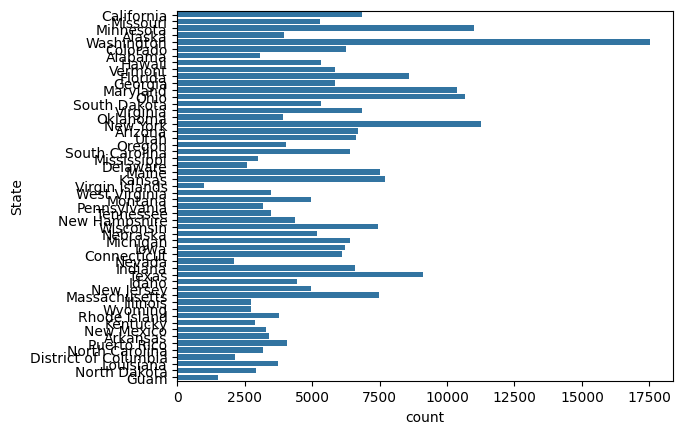

In [ ]:
#Countplot
sns.countplot(X_train['State'])

In [ ]:
#View missing values
X_train['State'].isna().sum()

0

####Sex

In [ ]:
#Check the occurrence of the values
X_train['Sex'].value_counts()

Sex
Female    156114
Male      139255
Name: count, dtype: int64

In [ ]:
#Describe
X_train['Sex'].describe()

count     295369
unique         2
top       Female
freq      156114
Name: Sex, dtype: object

<Axes: xlabel='count', ylabel='Sex'>

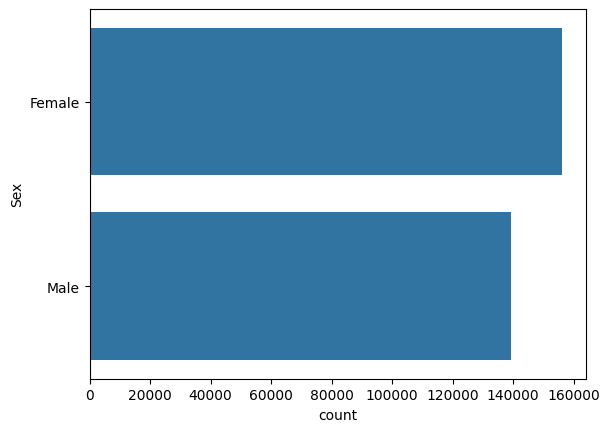

In [ ]:
#Countplot
sns.countplot(X_train['Sex'])

In [ ]:
#View missing values
X_train['Sex'].isna().sum()

0

####General health

In [ ]:
#Check the occurrence of the values
X_train['GeneralHealth'].value_counts()

GeneralHealth
Very good    99918
Good         94802
Excellent    47369
Fair         39911
Poor         12788
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='GeneralHealth'>

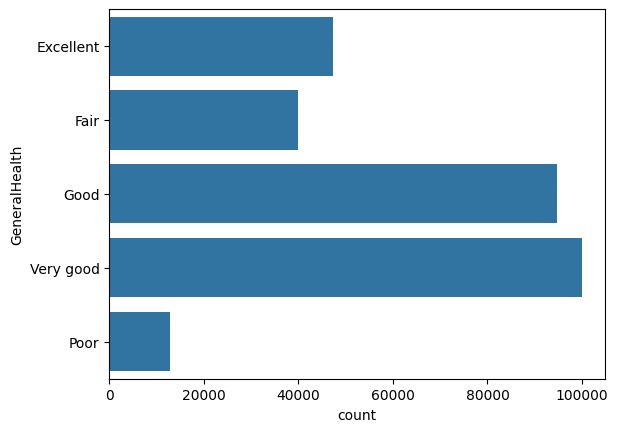

In [ ]:
#Countplot
sns.countplot(X_train['GeneralHealth'])

In [ ]:
#Describe
X_train['GeneralHealth'].describe()

count        294788
unique            5
top       Very good
freq          99918
Name: GeneralHealth, dtype: object

In [ ]:
#View missing values
X_train['GeneralHealth'].isna().sum()

581

####MentalHealthDays

In [ ]:
#Check the occurrence of the values
X_train['MentalHealthDays'].value_counts()

MentalHealthDays
0.0     175275
30.0     17829
2.0      16120
5.0      13502
3.0      10382
10.0     10348
1.0       9842
15.0      9824
20.0      6192
4.0       5422
7.0       5361
25.0      2037
14.0      1933
6.0       1550
8.0       1148
12.0       852
28.0       614
21.0       381
29.0       332
18.0       217
16.0       198
9.0        196
27.0       174
17.0       172
22.0       128
13.0       125
11.0        77
24.0        75
26.0        70
23.0        63
19.0        30
Name: count, dtype: int64

<ipython-input-33-9ee888ded13c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['MentalHealthDays'])


<Axes: xlabel='MentalHealthDays', ylabel='Density'>

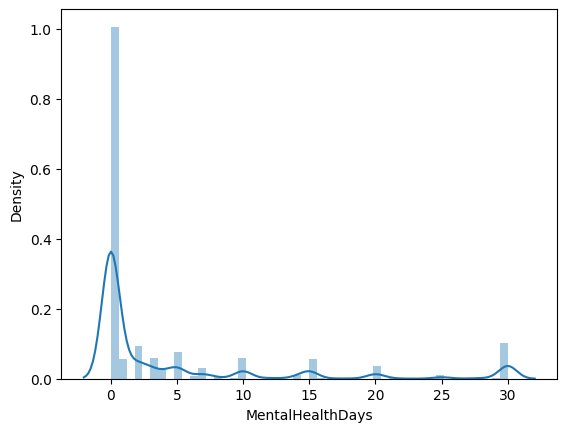

In [ ]:
#Distplot
sns.distplot(X_train['MentalHealthDays'])

<Axes: xlabel='MentalHealthDays', ylabel='Count'>

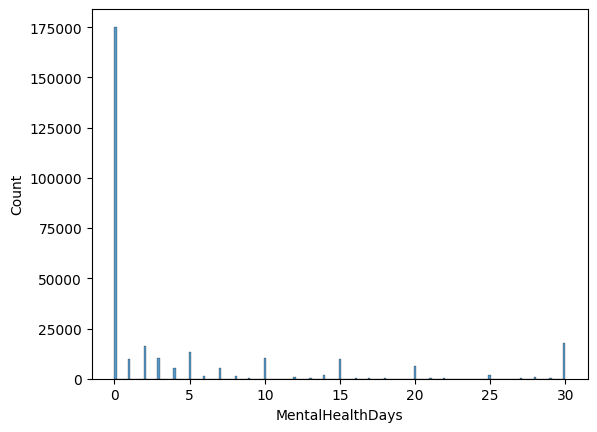

In [ ]:
#Histplot
sns.histplot(X_train['MentalHealthDays'])

<Axes: ylabel='MentalHealthDays'>

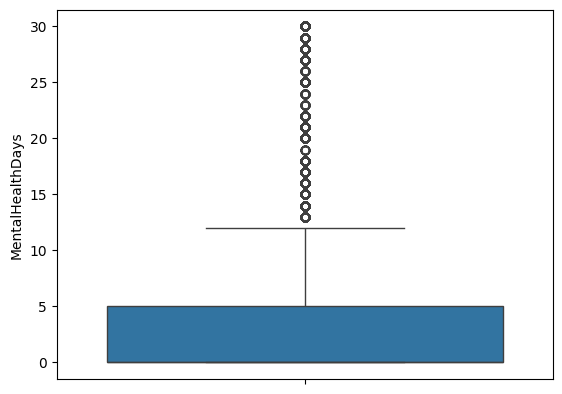

In [ ]:
#Boxplot
sns.boxplot(X_train['MentalHealthDays'])

In [ ]:
#Minimum
X_train['MentalHealthDays'].min()

0.0

In [ ]:
#Maximum
X_train['MentalHealthDays'].max()

30.0

In [ ]:
#Describe
X_train['MentalHealthDays'].describe()

count    290469.000000
mean          4.401179
std           8.374139
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          30.000000
Name: MentalHealthDays, dtype: float64

In [ ]:
#View missing values
X_train['MentalHealthDays'].isna().sum()

4900

####PhysicalHealthDays

In [ ]:
#Check the occurrence of the values
X_train['PhysicalHealthDays'].value_counts()

PhysicalHealthDays
0.0     177515
30.0     22036
2.0      17115
1.0      11614
3.0      10758
5.0      10362
10.0      7152
7.0       6302
15.0      5943
4.0       5726
20.0      3579
14.0      3326
6.0       1676
25.0      1437
8.0       1187
12.0       759
21.0       718
28.0       492
9.0        264
29.0       234
18.0       179
16.0       156
17.0       128
27.0       128
11.0       111
13.0       107
22.0        85
24.0        84
26.0        76
23.0        67
19.0        31
Name: count, dtype: int64

<ipython-input-41-7f8d1a438183>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['PhysicalHealthDays'])


<Axes: xlabel='PhysicalHealthDays', ylabel='Density'>

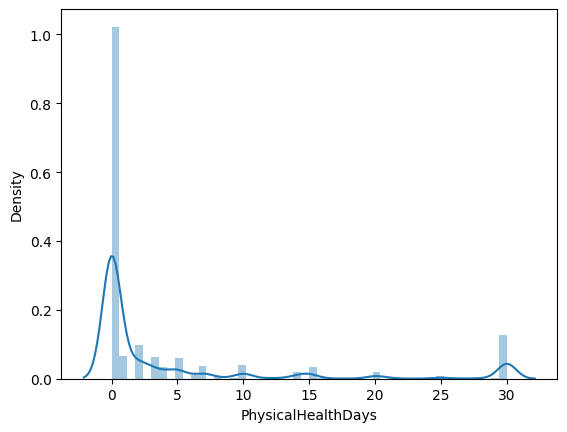

In [ ]:
#Distplot
sns.distplot(X_train['PhysicalHealthDays'])

<Axes: xlabel='PhysicalHealthDays', ylabel='Count'>

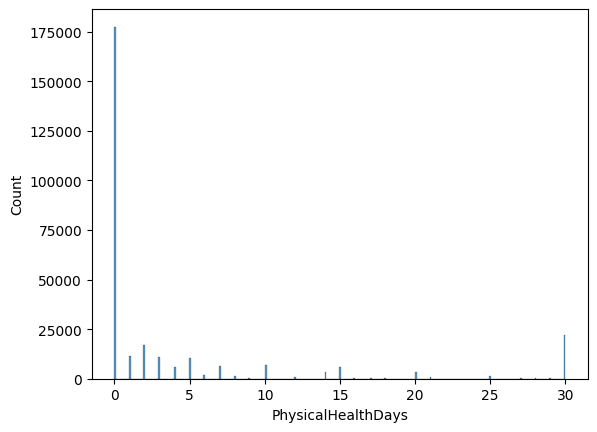

In [ ]:
#Histplot
sns.histplot(X_train['PhysicalHealthDays'])

<Axes: ylabel='PhysicalHealthDays'>

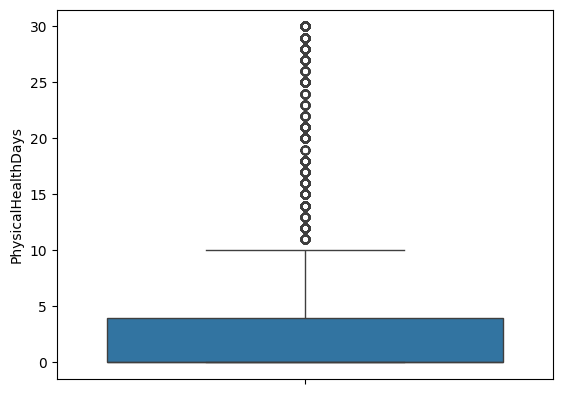

In [ ]:
#Boxplot
sns.boxplot(X_train['PhysicalHealthDays'])

In [ ]:
#Minimum
X_train['PhysicalHealthDays'].min()

0.0

In [ ]:
#Maximum
X_train['PhysicalHealthDays'].max()

30.0

In [ ]:
#Describe
X_train['PhysicalHealthDays'].describe()

count    289347.000000
mean          4.359437
std           8.683426
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: PhysicalHealthDays, dtype: float64

In [ ]:
#View missing values
X_train['PhysicalHealthDays'].isna().sum()

6022

####LastCheckupTime

In [ ]:
#Check the occurrence of the values
X_train['LastCheckupTime'].value_counts()

LastCheckupTime
Within past year (anytime less than 12 months ago)         233533
Within past 2 years (1 year but less than 2 years ago)      27841
Within past 5 years (2 years but less than 5 years ago)     16590
5 or more years ago                                         12774
Name: count, dtype: int64

In [ ]:
#Describe
X_train['LastCheckupTime'].describe()

count                                                290738
unique                                                    4
top       Within past year (anytime less than 12 months ...
freq                                                 233533
Name: LastCheckupTime, dtype: object

<Axes: xlabel='count', ylabel='LastCheckupTime'>

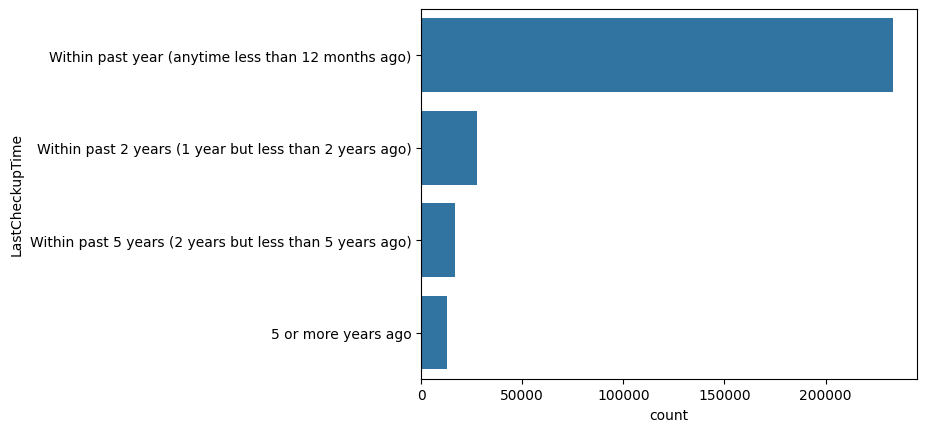

In [ ]:
#Countplot
sns.countplot(X_train['LastCheckupTime'])

In [ ]:
#View missing values
X_train['LastCheckupTime'].isna().sum()

4631

####PhysicalActivities

In [ ]:
#Check the occurrence of the values
X_train['PhysicalActivities'].value_counts()

PhysicalActivities
Yes    225071
No      69800
Name: count, dtype: int64

In [ ]:
#Describe
X_train['PhysicalActivities'].describe()

count     294871
unique         2
top          Yes
freq      225071
Name: PhysicalActivities, dtype: object

<Axes: xlabel='count', ylabel='PhysicalActivities'>

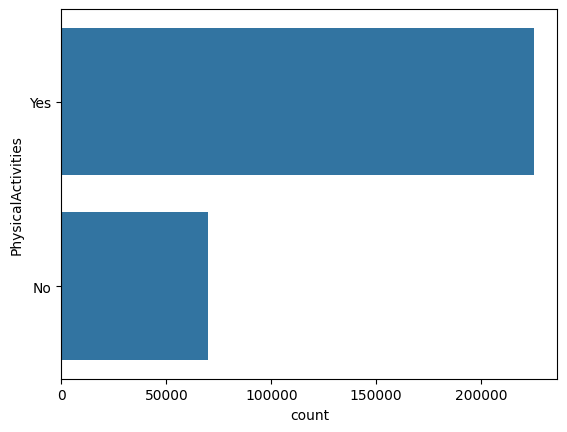

In [ ]:
#Countplot
sns.countplot(X_train['PhysicalActivities'])

In [ ]:
#View missing values
X_train['PhysicalActivities'].isna().sum()

498

####SleepHours

In [ ]:
#Check the occurrence of the values
X_train['SleepHours'].value_counts()

SleepHours
7.0     89294
8.0     83002
6.0     63883
5.0     20047
9.0     14263
4.0      8105
10.0     6902
3.0      2085
12.0     1940
2.0       946
1.0       695
11.0      450
16.0      202
14.0      200
15.0      190
18.0      118
13.0      114
20.0       87
24.0       27
17.0       18
23.0        6
22.0        6
19.0        4
21.0        1
Name: count, dtype: int64

<ipython-input-57-a6ba7bdcf626>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['SleepHours'])


<Axes: xlabel='SleepHours', ylabel='Density'>

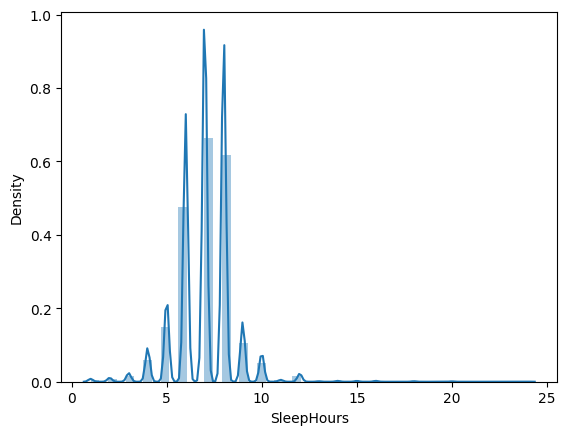

In [ ]:
#Distplot
sns.distplot(X_train['SleepHours'])

<Axes: xlabel='SleepHours', ylabel='Count'>

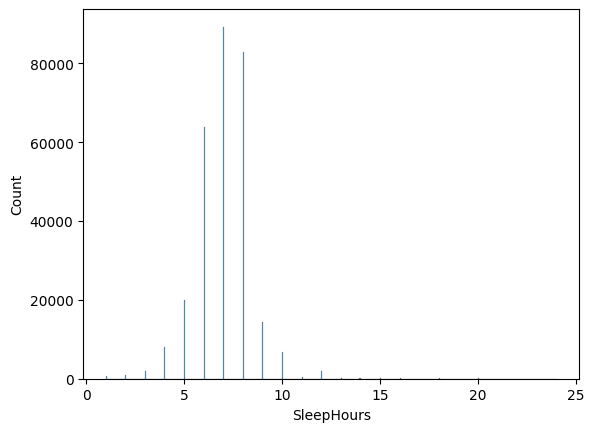

In [ ]:
#Histplot
sns.histplot(X_train['SleepHours'])

<Axes: ylabel='SleepHours'>

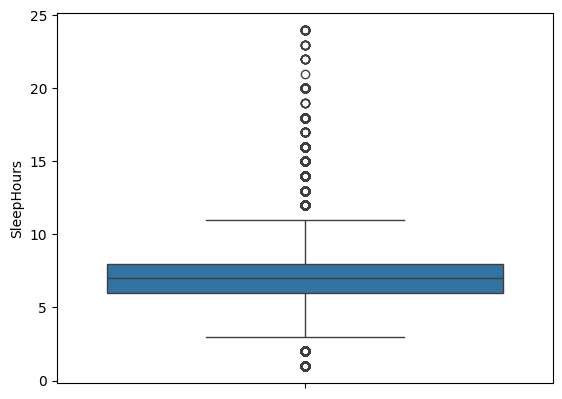

In [ ]:
#Boxplot
sns.boxplot(X_train['SleepHours'])

In [ ]:
#Describe
X_train['SleepHours'].describe()

count    292585.00000
mean          7.02372
std           1.48063
min           1.00000
25%           6.00000
50%           7.00000
75%           8.00000
max          24.00000
Name: SleepHours, dtype: float64

In [ ]:
#View missing values
X_train['SleepHours'].isna().sum()

2784

####RemovedTeeth

In [ ]:
#Check the occurrence of the values
X_train['RemovedTeeth'].value_counts()

RemovedTeeth
None of them              155263
1 to 5                     86591
6 or more, but not all     30489
All                        16737
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='RemovedTeeth'>

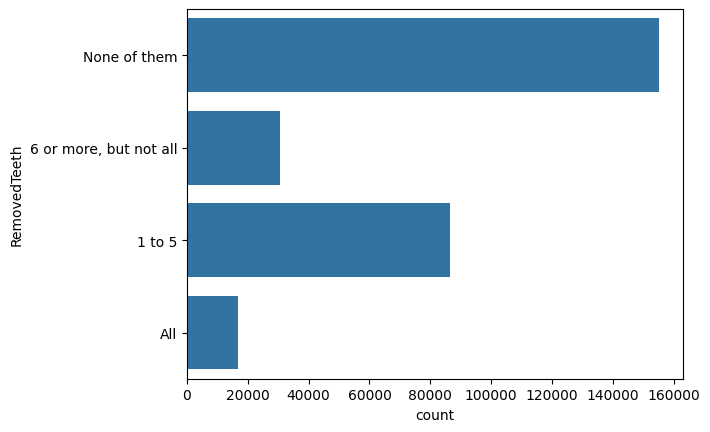

In [ ]:
#Countplot
sns.countplot(X_train['RemovedTeeth'])

In [ ]:
#Describe
X_train['RemovedTeeth'].describe()

count           289080
unique               4
top       None of them
freq            155263
Name: RemovedTeeth, dtype: object

In [ ]:
#View missing values
X_train['RemovedTeeth'].isna().sum()

6289

####HadAngina

In [ ]:
#Check the occurrence of the values
X_train['HadAngina'].value_counts()

HadAngina
No     275096
Yes     17888
Name: count, dtype: int64

<Axes: xlabel='HadAngina', ylabel='count'>

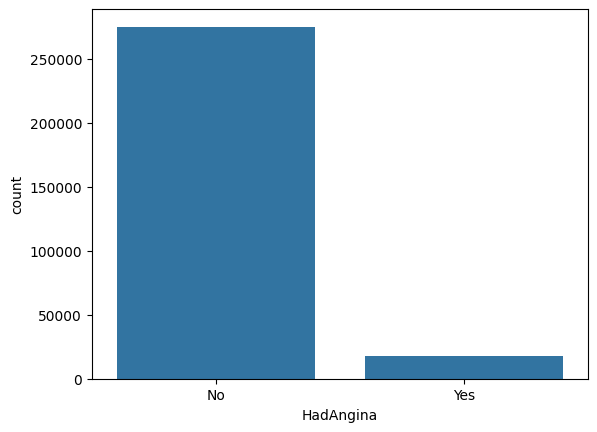

In [ ]:
#Countplot
sns.countplot(x=X_train['HadAngina'])

In [ ]:
#Describe
X_train['HadAngina'].describe()

count     292984
unique         2
top           No
freq      275096
Name: HadAngina, dtype: object

In [ ]:
#View missing values
X_train['HadAngina'].isna().sum()

2385

####HadStroke

In [ ]:
#Check the occurrence of the values
X_train['HadStroke'].value_counts()

HadStroke
No     281998
Yes     12683
Name: count, dtype: int64

<Axes: xlabel='HadStroke', ylabel='count'>

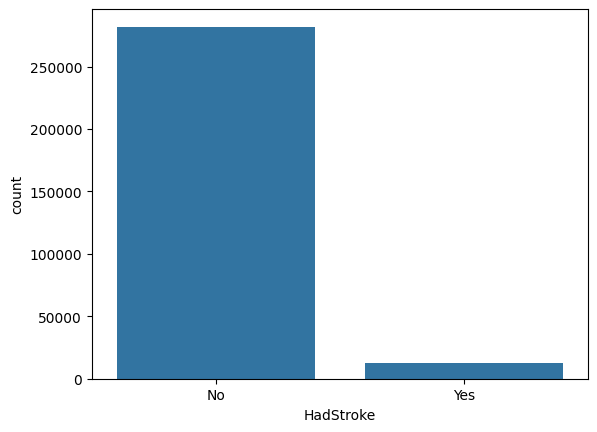

In [ ]:
#Countplot
sns.countplot(x=X_train['HadStroke'])

In [ ]:
#Describe
X_train['HadStroke'].describe()

count     294681
unique         2
top           No
freq      281998
Name: HadStroke, dtype: object

In [ ]:
#View missing values
X_train['HadStroke'].isna().sum()

688

####HadAsthma

In [ ]:
#Check the occurrence of the values
X_train['HadAsthma'].value_counts()

HadAsthma
No     249819
Yes     44737
Name: count, dtype: int64

<Axes: xlabel='HadAsthma', ylabel='count'>

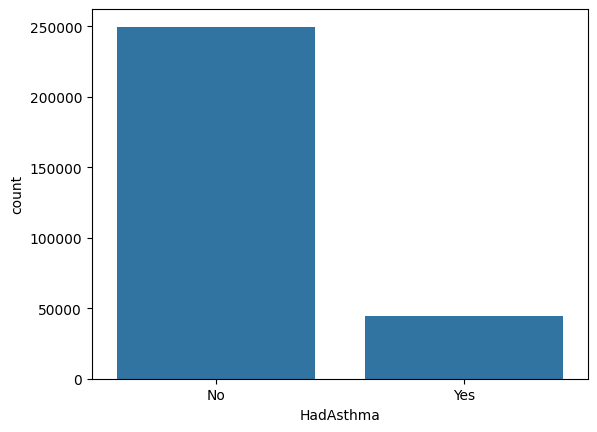

In [ ]:
#Countplot
sns.countplot(x=X_train['HadAsthma'])

In [ ]:
#Describe
X_train['HadAsthma'].describe()

count     294556
unique         2
top           No
freq      249819
Name: HadAsthma, dtype: object

In [ ]:
#View missing values
X_train['HadAsthma'].isna().sum()

813

####HadSkinCancer

In [ ]:
#Check the occurrence of the values
X_train['HadSkinCancer'].value_counts()

HadSkinCancer
No     269334
Yes     24328
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HadSkinCancer'>

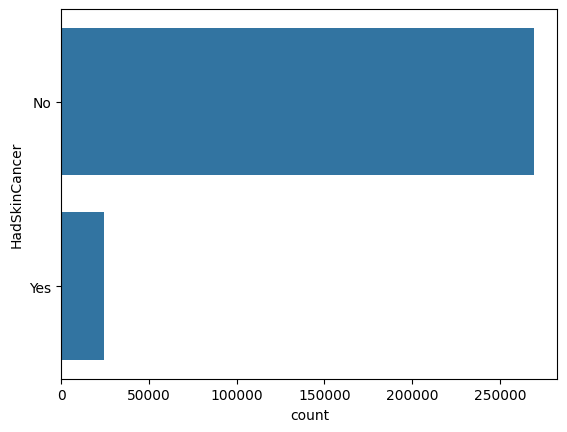

In [ ]:
#Countplot
sns.countplot(X_train['HadSkinCancer'])

In [ ]:
#Describe
X_train['HadSkinCancer'].describe()

count     293662
unique         2
top           No
freq      269334
Name: HadSkinCancer, dtype: object

In [ ]:
#View missing values
X_train['HadSkinCancer'].isna().sum()

1707

####HadCOPD

In [ ]:
#Check the occurrence of the values
X_train['HadCOPD'].value_counts()

HadCOPD
No     270577
Yes     23762
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HadCOPD'>

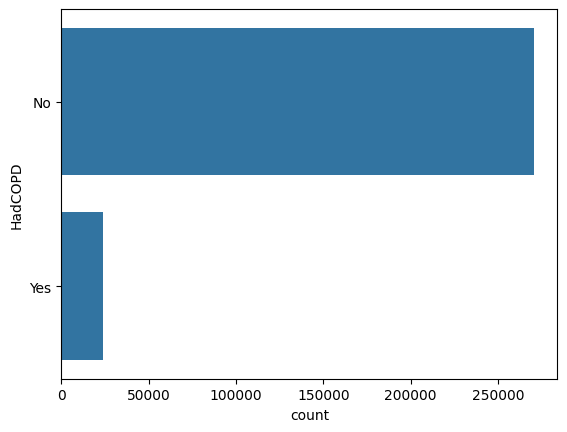

In [ ]:
#Countplot
sns.countplot(X_train['HadCOPD'])

In [ ]:
#Describe
X_train['HadCOPD'].describe()

count     294339
unique         2
top           No
freq      270577
Name: HadCOPD, dtype: object

In [ ]:
#View missing values
X_train['HadCOPD'].isna().sum()

1030

####HadDepressiveDisorder

In [ ]:
#Check the occurrence of the values
X_train['HadDepressiveDisorder'].value_counts()

HadDepressiveDisorder
No     231728
Yes     62291
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HadDepressiveDisorder'>

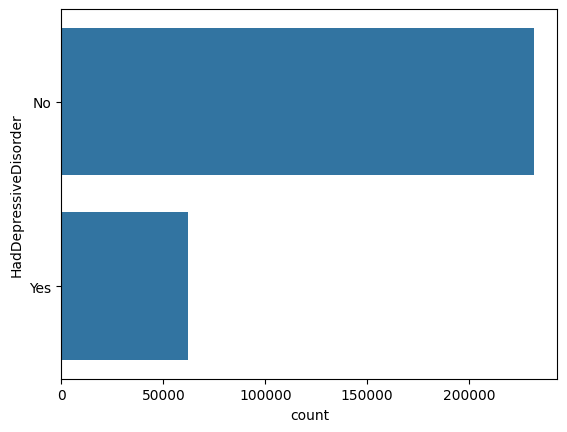

In [ ]:
#Countplot
sns.countplot(X_train['HadDepressiveDisorder'])

In [ ]:
#Describe
X_train['HadDepressiveDisorder'].describe()

count     294019
unique         2
top           No
freq      231728
Name: HadDepressiveDisorder, dtype: object

In [ ]:
#View missing values
X_train['HadDepressiveDisorder'].isna().sum()

1350

####HadKidneyDisease

In [ ]:
#Check the occurrence of the values
X_train['HadKidneyDisease'].value_counts()

HadKidneyDisease
No     280783
Yes     13680
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HadKidneyDisease'>

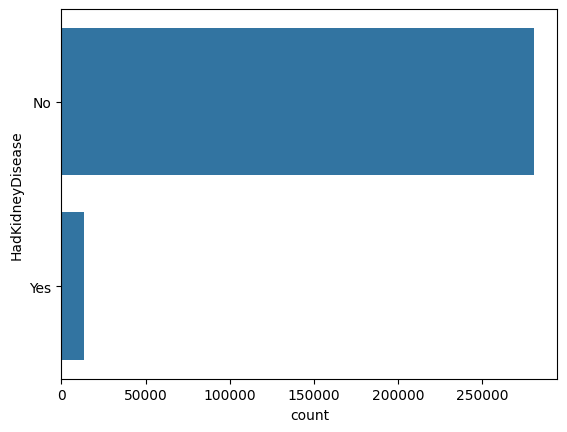

In [ ]:
#Countplot
sns.countplot(X_train['HadKidneyDisease'])

In [ ]:
#Describe
X_train['HadKidneyDisease'].describe()

count     294463
unique         2
top           No
freq      280783
Name: HadKidneyDisease, dtype: object

In [ ]:
#View missing values
X_train['HadKidneyDisease'].isna().sum()

906

####HadArthritis

In [ ]:
#Check the occurrence of the values
X_train['HadArthritis'].value_counts()

HadArthritis
No     191995
Yes    102063
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HadArthritis'>

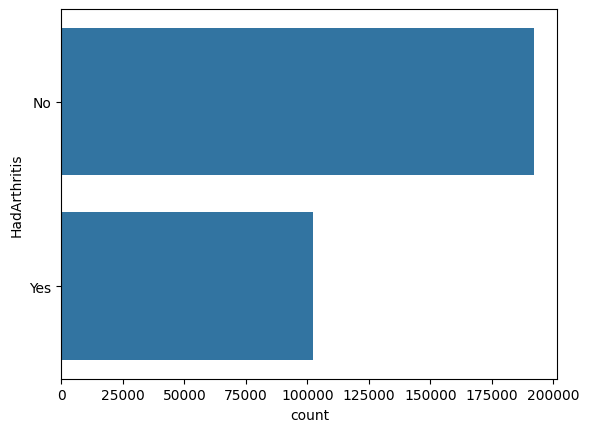

In [ ]:
#Countplot
sns.countplot(X_train['HadArthritis'])

In [ ]:
#Describe
X_train['HadArthritis'].describe()

count     294058
unique         2
top           No
freq      191995
Name: HadArthritis, dtype: object

In [ ]:
#View missing values
X_train['HadArthritis'].isna().sum()

1311

####HadDiabetes

In [ ]:
#Check the occurrence of the values
X_train['HadDiabetes'].value_counts()

HadDiabetes
No                                         244722
Yes                                         40725
No, pre-diabetes or borderline diabetes      6969
Yes, but only during pregnancy (female)      2540
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HadDiabetes'>

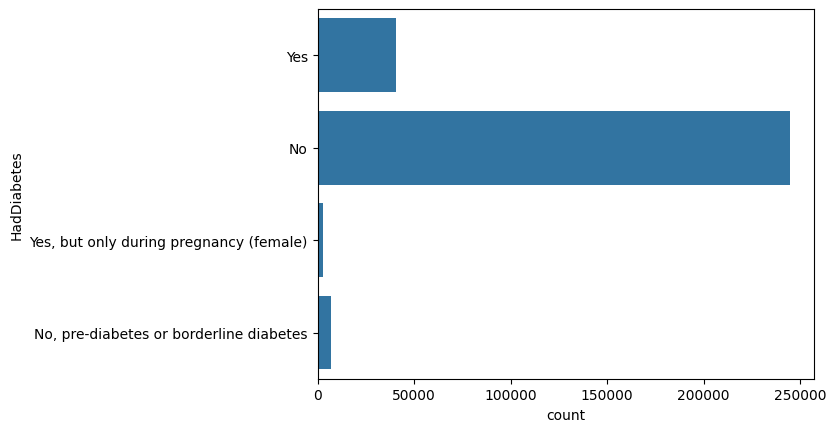

In [ ]:
#Countplot
sns.countplot(X_train['HadDiabetes'])

In [ ]:
#Describe
X_train['HadDiabetes'].describe()

count     294956
unique         4
top           No
freq      244722
Name: HadDiabetes, dtype: object

In [ ]:
#View missing values
X_train['HadDiabetes'].isna().sum()

413

####DeafOrHardOfHearing

In [ ]:
#Check the occurrence of the values
X_train['DeafOrHardOfHearing'].value_counts()

DeafOrHardOfHearing
No     267487
Yes     27036
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='DeafOrHardOfHearing'>

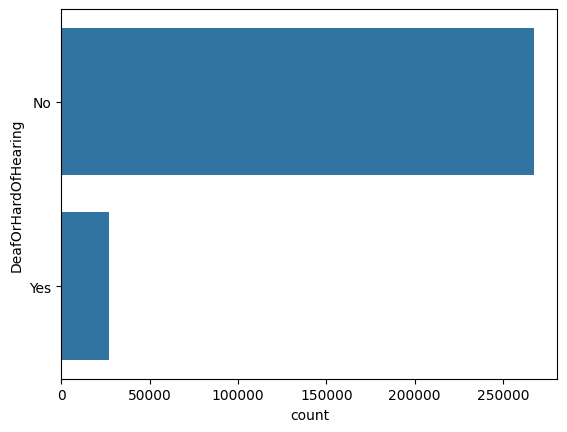

In [ ]:
#Countplot
sns.countplot(X_train['DeafOrHardOfHearing'])

In [ ]:
#Describe
X_train['DeafOrHardOfHearing'].describe()

count     294523
unique         2
top           No
freq      267487
Name: DeafOrHardOfHearing, dtype: object

In [ ]:
#View missing values
X_train['DeafOrHardOfHearing'].isna().sum()

846

####BlindOrVisionDifficulty

In [ ]:
#Check the occurrence of the values
X_train['BlindOrVisionDifficulty'].value_counts()

BlindOrVisionDifficulty
No     278470
Yes     16233
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='BlindOrVisionDifficulty'>

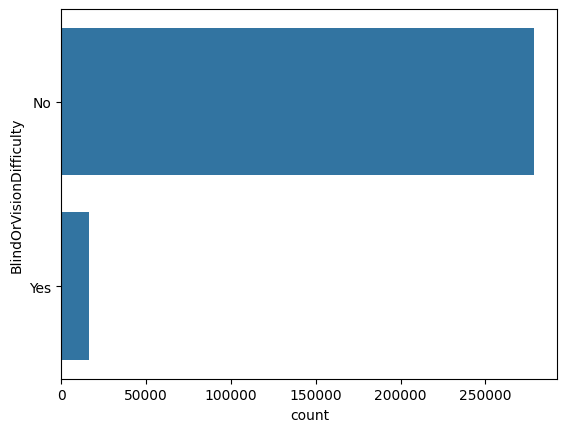

In [ ]:
#Countplot
sns.countplot(X_train['BlindOrVisionDifficulty'])

In [ ]:
#Describe
X_train['BlindOrVisionDifficulty'].describe()

count     294703
unique         2
top           No
freq      278470
Name: BlindOrVisionDifficulty, dtype: object

In [ ]:
#View missing values
X_train['BlindOrVisionDifficulty'].isna().sum()

666

####DifficultyConcentrating

In [ ]:
#Check the occurrence of the values
X_train['DifficultyConcentrating'].value_counts()

DifficultyConcentrating
No     258759
Yes     35054
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='DifficultyConcentrating'>

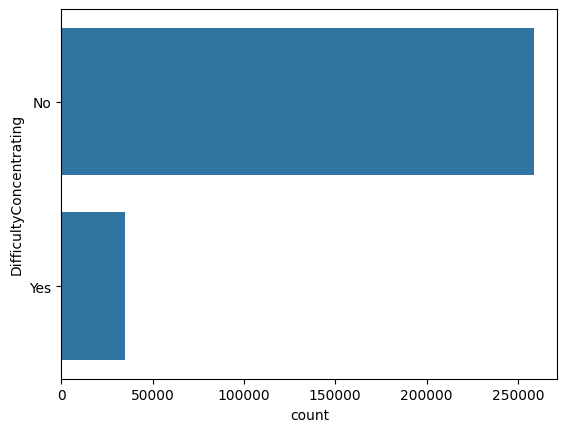

In [ ]:
#Countplot
sns.countplot(X_train['DifficultyConcentrating'])

In [ ]:
#Describe
X_train['DifficultyConcentrating'].describe()

count     293813
unique         2
top           No
freq      258759
Name: DifficultyConcentrating, dtype: object

In [ ]:
#View missing values
X_train['DifficultyConcentrating'].isna().sum()

1556

####DifficultyWalking

In [ ]:
#Check the occurrence of the values
X_train['DifficultyWalking'].value_counts()

DifficultyWalking
No     247287
Yes     47264
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='DifficultyWalking'>

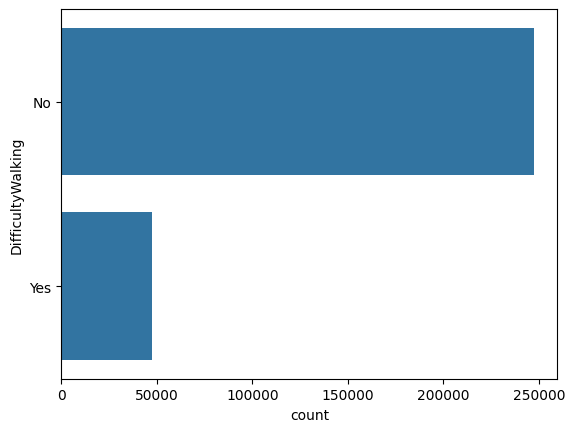

In [ ]:
#Countplot
sns.countplot(X_train['DifficultyWalking'])

In [ ]:
#Describe
X_train['DifficultyWalking'].describe()

count     294551
unique         2
top           No
freq      247287
Name: DifficultyWalking, dtype: object

In [ ]:
#View missing values
X_train['DifficultyWalking'].isna().sum()

818

####DifficultyDressingBathing

In [ ]:
#Check the occurrence of the values
X_train['DifficultyDressingBathing'].value_counts()

DifficultyDressingBathing
No     283530
Yes     11543
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='DifficultyDressingBathing'>

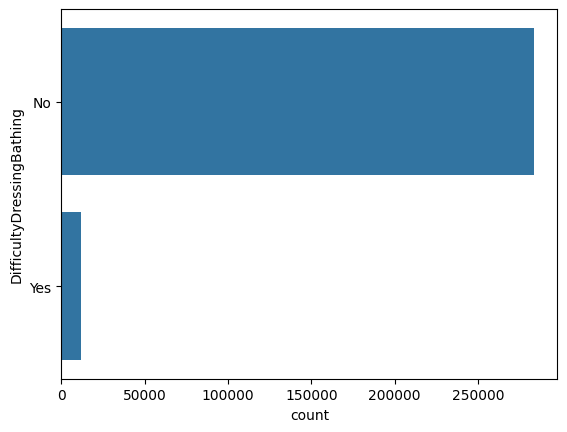

In [ ]:
#Countplot
sns.countplot(X_train['DifficultyDressingBathing'])

In [ ]:
#Describe
X_train['DifficultyDressingBathing'].describe()

count     295073
unique         2
top           No
freq      283530
Name: DifficultyDressingBathing, dtype: object

In [ ]:
#View missing values
X_train['DifficultyDressingBathing'].isna().sum()

296

####DifficultyErrands

In [ ]:
#Check the occurrence of the values
X_train['DifficultyErrands'].value_counts()

DifficultyErrands
No     272233
Yes     22455
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='DifficultyErrands'>

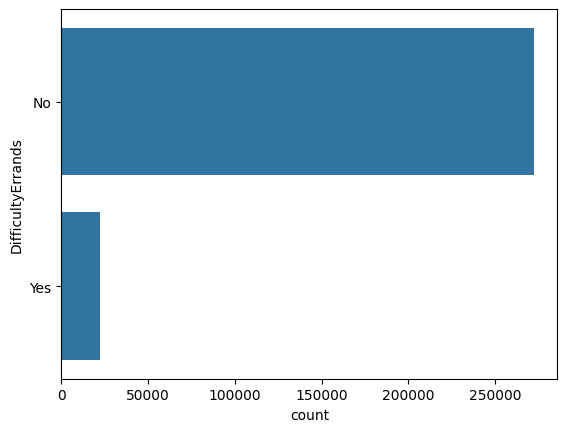

In [ ]:
#Countplot
sns.countplot(X_train['DifficultyErrands'])

In [ ]:
#Describe
X_train['DifficultyErrands'].describe()

count     294688
unique         2
top           No
freq      272233
Name: DifficultyErrands, dtype: object

In [ ]:
#View missing values
X_train['DifficultyErrands'].isna().sum()

681

####SmokerStatus

In [ ]:
#Check the occurrence of the values
X_train['SmokerStatus'].value_counts()

SmokerStatus
Never smoked                             176987
Former smoker                             81322
Current smoker - now smokes every day     25499
Current smoker - now smokes some days      9802
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='SmokerStatus'>

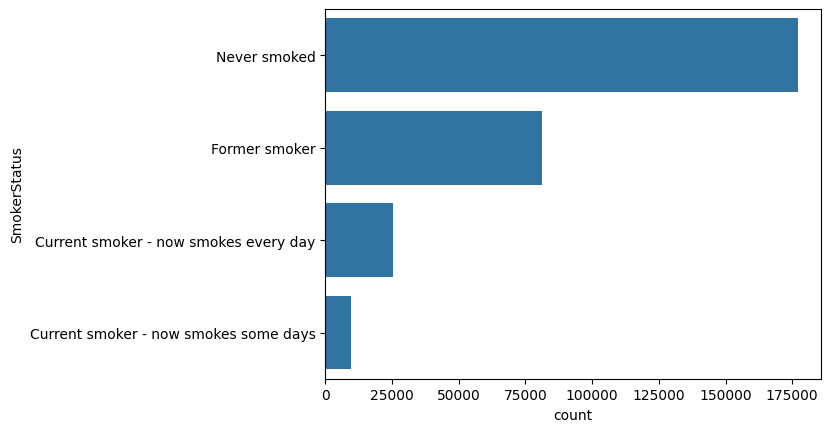

In [ ]:
#Countplot
sns.countplot(X_train['SmokerStatus'])

In [ ]:
#Describe
X_train['SmokerStatus'].describe()

count           293610
unique               4
top       Never smoked
freq            176987
Name: SmokerStatus, dtype: object

In [ ]:
#View missing values
X_train['SmokerStatus'].isna().sum()

1759

####ECigaretteUsage

In [ ]:
#Check the occurrence of the values
X_train['ECigaretteUsage'].value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    225030
Not at all (right now)                        53653
Use them some days                             8352
Use them every day                             7464
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='ECigaretteUsage'>

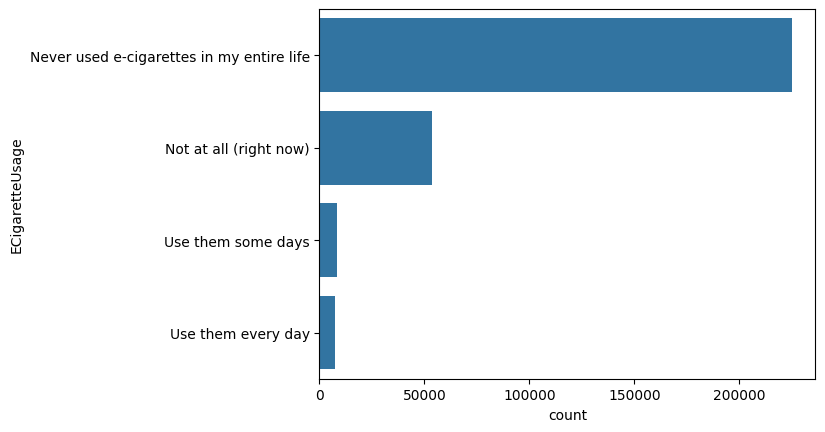

In [ ]:
#Countplot
sns.countplot(X_train['ECigaretteUsage'])

In [ ]:
#Describe
X_train['ECigaretteUsage'].describe()

count                                        294499
unique                                            4
top       Never used e-cigarettes in my entire life
freq                                         225030
Name: ECigaretteUsage, dtype: object

In [ ]:
#View missing values
X_train['ECigaretteUsage'].isna().sum()

870

####ChestScan

In [ ]:
#Check the occurrence of the values
X_train['ChestScan'].value_counts()

ChestScan
No     162977
Yes    120783
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='ChestScan'>

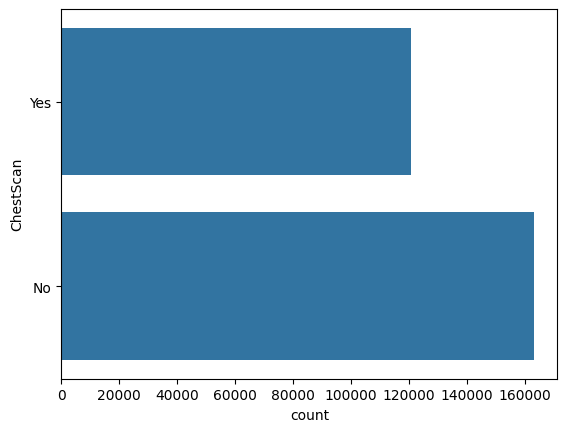

In [ ]:
#Countplot
sns.countplot(X_train['ChestScan'])

In [ ]:
#Describe
X_train['ChestScan'].describe()

count     283760
unique         2
top           No
freq      162977
Name: ChestScan, dtype: object

In [ ]:
#View missing values
X_train['ChestScan'].isna().sum()

11609

####RaceEthnicityCategory

In [ ]:
#Check the occurrence of the values
X_train['RaceEthnicityCategory'].value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         216554
Hispanic                          27939
Black only, Non-Hispanic          22359
Other race only, Non-Hispanic     14603
Multiracial, Non-Hispanic          6470
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='RaceEthnicityCategory'>

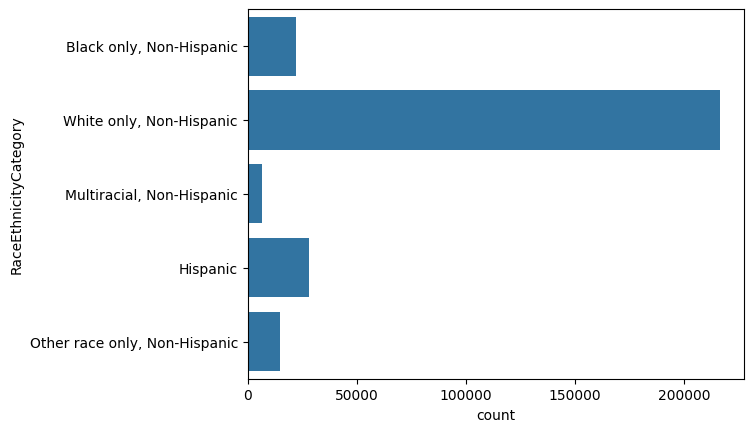

In [ ]:
#Countplot
sns.countplot(X_train['RaceEthnicityCategory'])

In [ ]:
#Describe
X_train['RaceEthnicityCategory'].describe()

count                       287925
unique                           5
top       White only, Non-Hispanic
freq                        216554
Name: RaceEthnicityCategory, dtype: object

In [ ]:
#View missing values
X_train['RaceEthnicityCategory'].isna().sum()

7444

####AgeCategory

In [ ]:
#Check the occurrence of the values
X_train['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       31915
Age 60 to 64       29839
Age 70 to 74       29649
Age 55 to 59       24557
Age 80 or older    23975
Age 50 to 54       22250
Age 75 to 79       22063
Age 40 to 44       19689
Age 45 to 49       18994
Age 35 to 39       18857
Age 18 to 24       17955
Age 30 to 34       17043
Age 25 to 29       14691
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='AgeCategory'>

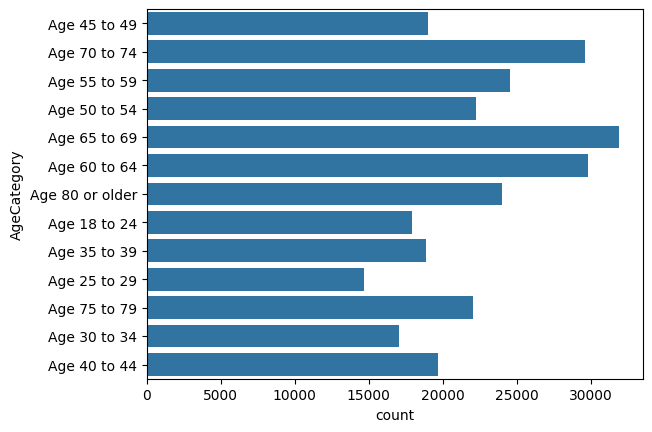

In [ ]:
#Countplot
sns.countplot(X_train['AgeCategory'])

In [ ]:
#Describe
X_train['AgeCategory'].describe()

count           291477
unique              13
top       Age 65 to 69
freq             31915
Name: AgeCategory, dtype: object

In [ ]:
#View missing values
X_train['AgeCategory'].isna().sum()

3892

####HeightInMeters

In [ ]:
#Check the occurrence of the values
X_train['HeightInMeters'].value_counts()

HeightInMeters
1.68    25689
1.63    24821
1.70    23553
1.65    22729
1.78    22396
        ...  
2.34        1
1.03        1
2.02        1
2.07        1
0.95        1
Name: count, Length: 104, dtype: int64

<ipython-input-147-25d31b87c454>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['HeightInMeters'])


<Axes: xlabel='HeightInMeters', ylabel='Density'>

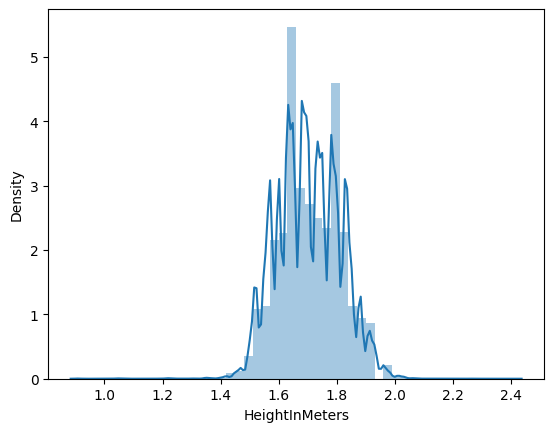

In [ ]:
#Distplot
sns.distplot(X_train['HeightInMeters'])

<Axes: xlabel='HeightInMeters', ylabel='Count'>

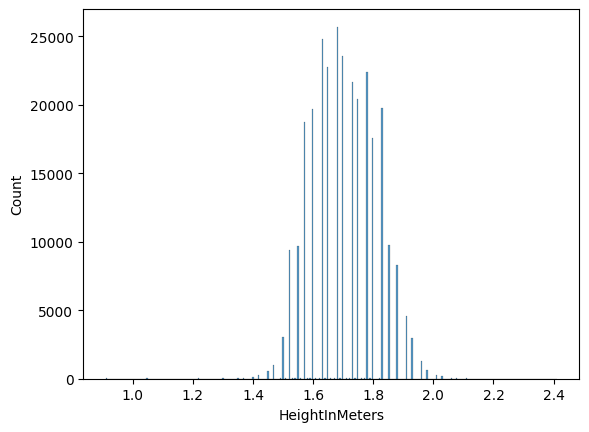

In [ ]:
#Histplot
sns.histplot(X_train['HeightInMeters'])

<Axes: ylabel='HeightInMeters'>

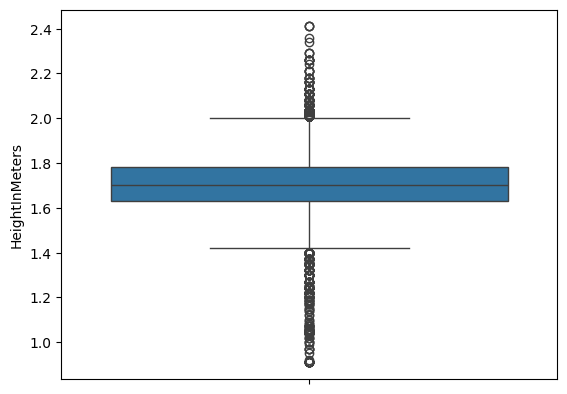

In [ ]:
#Boxplot
sns.boxplot(X_train['HeightInMeters'])

In [ ]:
#Minimum
X_train['HeightInMeters'].min()

0.91

In [ ]:
#Maximum
X_train['HeightInMeters'].max()

2.41

In [ ]:
#Describe
X_train['HeightInMeters'].describe()

count    290340.000000
mean          1.702991
std           0.107134
min           0.910000
25%           1.630000
50%           1.700000
75%           1.780000
max           2.410000
Name: HeightInMeters, dtype: float64

In [ ]:
#View missing values
X_train['HeightInMeters'].isna().sum()

5029

####WeightInKilograms

In [ ]:
#Check the occurrence of the values
X_train['WeightInKilograms'].value_counts()

WeightInKilograms
90.72     14754
81.65     13634
68.04     12150
72.57     11998
77.11     11160
          ...  
116.00        1
201.85        1
219.09        1
175.00        1
200.49        1
Name: count, Length: 545, dtype: int64

<ipython-input-155-a7a838c8cff8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['WeightInKilograms'])


<Axes: xlabel='WeightInKilograms', ylabel='Density'>

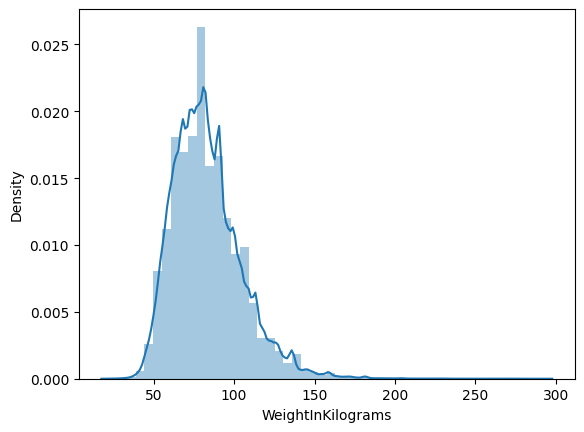

In [ ]:
#Distplot
sns.distplot(X_train['WeightInKilograms'])

<Axes: xlabel='WeightInKilograms', ylabel='Count'>

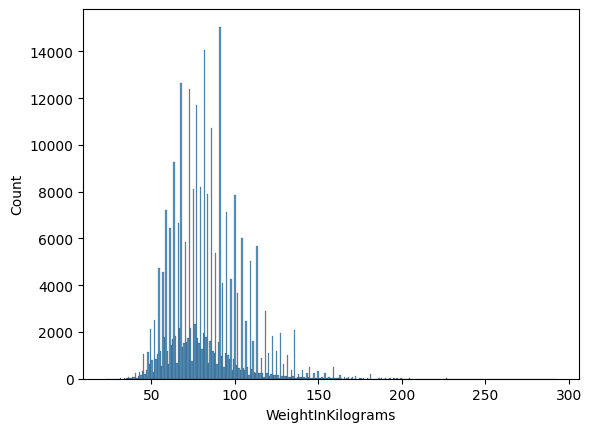

In [ ]:
#Histplot
sns.histplot(X_train['WeightInKilograms'])

<Axes: ylabel='WeightInKilograms'>

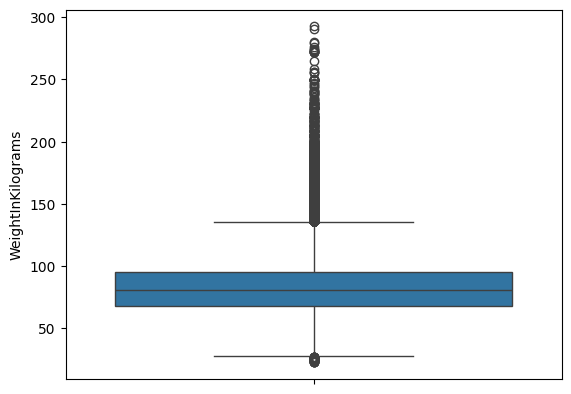

In [ ]:
#Boxplot
sns.boxplot(X_train['WeightInKilograms'])

In [ ]:
#Minimum
X_train['WeightInKilograms'].min()

22.68

In [ ]:
#Maximum
X_train['WeightInKilograms'].max()

292.57

In [ ]:
#Describe
X_train['WeightInKilograms'].describe()

count    281810.000000
mean         83.160288
std          21.444986
min          22.680000
25%          68.040000
50%          80.740000
75%          95.250000
max         292.570000
Name: WeightInKilograms, dtype: float64

In [ ]:
#View missing values
X_train['WeightInKilograms'].isna().sum()

13559

####BMI

In [ ]:
#Check the occurrence of the values
X_train['BMI'].value_counts()

BMI
26.63    2965
27.46    2317
24.41    2247
27.44    2220
27.12    2128
         ... 
53.07       1
86.51       1
52.93       1
45.59       1
17.41       1
Name: count, Length: 3682, dtype: int64

<ipython-input-163-2cccca4ce91d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

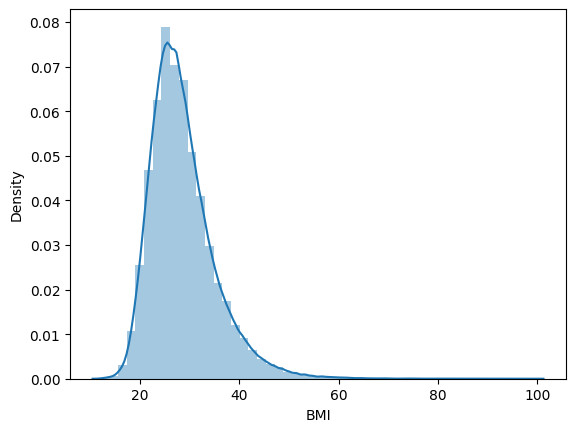

In [ ]:
#Distplot
sns.distplot(X_train['BMI'])

<Axes: xlabel='BMI', ylabel='Count'>

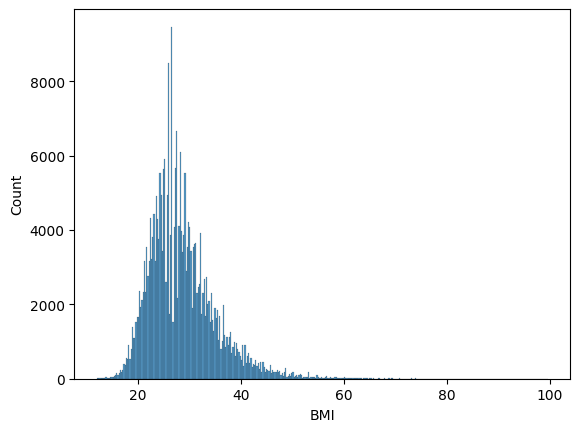

In [ ]:
#Histplot
sns.histplot(X_train['BMI'])

In [ ]:
#Minimum
X_train['BMI'].min()

12.02

In [ ]:
#Maximum
X_train['BMI'].max()

99.64

In [ ]:
#Describe
X_train['BMI'].describe()

count    277997.000000
mean         28.552865
std           6.562458
min          12.020000
25%          24.130000
50%          27.440000
75%          31.750000
max          99.640000
Name: BMI, dtype: float64

In [ ]:
#View missing values
X_train['BMI'].isna().sum()

17372

####AlcoholDrinkers

In [ ]:
#Check the occurrence of the values
X_train['AlcoholDrinkers'].value_counts()

AlcoholDrinkers
Yes    154731
No     137423
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='AlcoholDrinkers'>

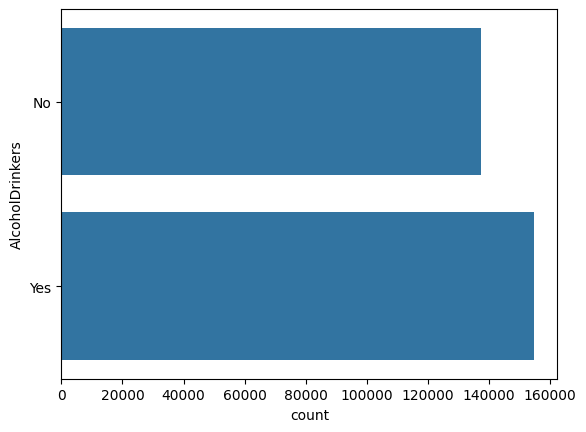

In [ ]:
#Countplot
sns.countplot(X_train['AlcoholDrinkers'])

In [ ]:
#Describe
X_train['AlcoholDrinkers'].describe()

count     292154
unique         2
top          Yes
freq      154731
Name: AlcoholDrinkers, dtype: object

In [ ]:
#View missing values
X_train['AlcoholDrinkers'].isna().sum()

3215

####HIVTesting

In [ ]:
#Check the occurrence of the values
X_train['HIVTesting'].value_counts()

HIVTesting
No     185435
Yes     95811
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HIVTesting'>

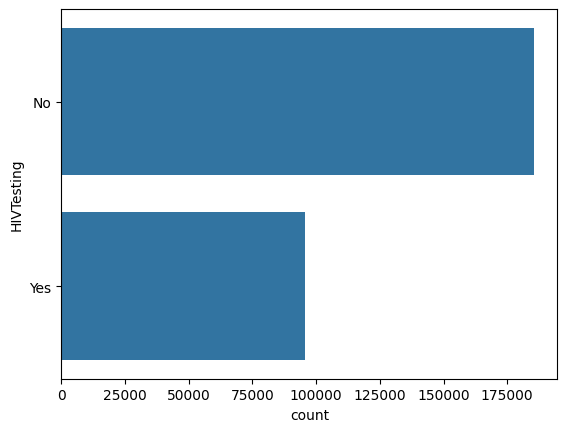

In [ ]:
#Countplot
sns.countplot(X_train['HIVTesting'])

In [ ]:
#Describe
X_train['HIVTesting'].describe()

count     281246
unique         2
top           No
freq      185435
Name: HIVTesting, dtype: object

In [ ]:
#View missing values
X_train['HIVTesting'].isna().sum()

14123

####FluVaxLast12

In [ ]:
#Check the occurrence of the values
X_train['FluVaxLast12'].value_counts()

FluVaxLast12
Yes    154482
No     139183
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='FluVaxLast12'>

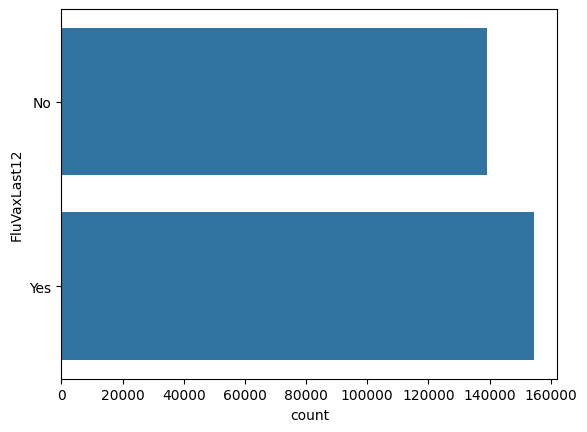

In [ ]:
#Countplot
sns.countplot(X_train['FluVaxLast12'])

In [ ]:
#Describe
X_train['FluVaxLast12'].describe()

count     293665
unique         2
top          Yes
freq      154482
Name: FluVaxLast12, dtype: object

In [ ]:
#View missing values
X_train['FluVaxLast12'].isna().sum()

1704

####PneumoVaxEver

In [ ]:
#Check the occurrence of the values
X_train['PneumoVaxEver'].value_counts()

PneumoVaxEver
No     159780
Yes    113050
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='PneumoVaxEver'>

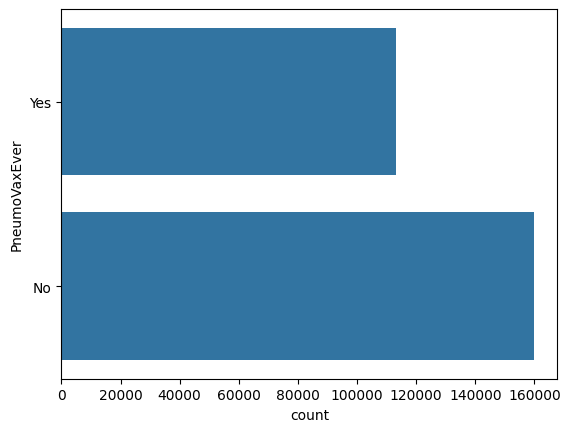

In [ ]:
#Countplot
sns.countplot(X_train['PneumoVaxEver'])

In [ ]:
#Describe
X_train['PneumoVaxEver'].describe()

count     272830
unique         2
top           No
freq      159780
Name: PneumoVaxEver, dtype: object

In [ ]:
#View missing values
X_train['PneumoVaxEver'].isna().sum()

22539

####TetanusLast10Tdap

In [ ]:
#Check the occurrence of the values
X_train['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    90118
Yes, received tetanus shot but not sure what type            84312
Yes, received Tdap                                           74421
Yes, received tetanus shot, but not Tdap                     20503
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='TetanusLast10Tdap'>

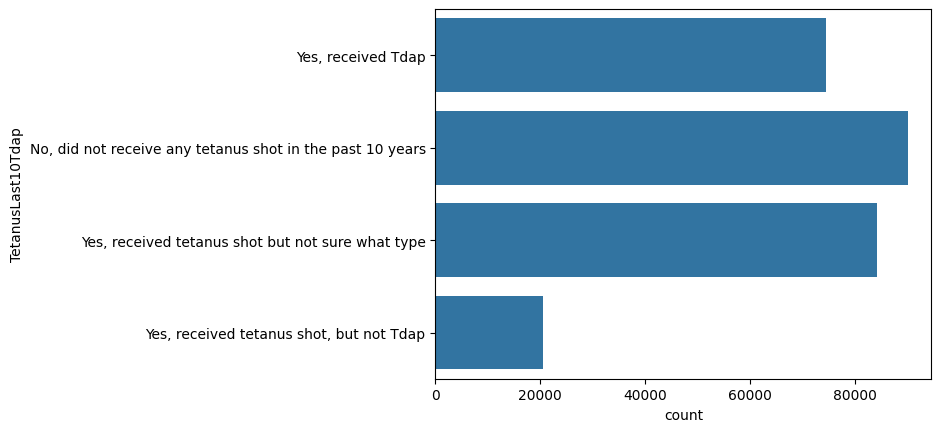

In [ ]:
#Countplot
sns.countplot(X_train['TetanusLast10Tdap'])

In [ ]:
#Describe
X_train['TetanusLast10Tdap'].describe()

count                                                269354
unique                                                    4
top       No, did not receive any tetanus shot in the pa...
freq                                                  90118
Name: TetanusLast10Tdap, dtype: object

In [ ]:
#View missing values
X_train['TetanusLast10Tdap'].isna().sum()

26015

####HighRiskLastYear

In [ ]:
#Check the occurrence of the values
X_train['HighRiskLastYear'].value_counts()

HighRiskLastYear
No     279269
Yes     12775
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HighRiskLastYear'>

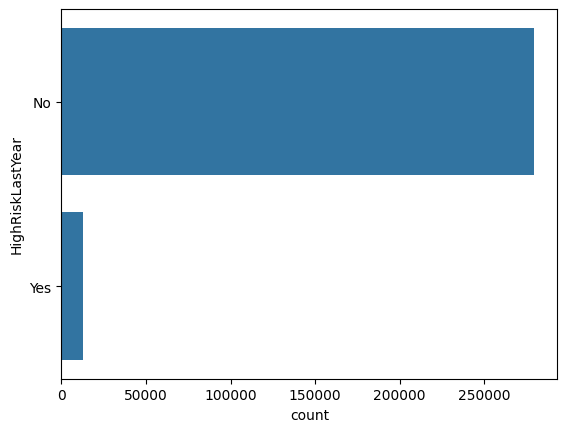

In [ ]:
#Countplot
sns.countplot(X_train['HighRiskLastYear'])

In [ ]:
#Describe
X_train['HighRiskLastYear'].describe()

count     292044
unique         2
top           No
freq      279269
Name: HighRiskLastYear, dtype: object

In [ ]:
#View missing values
X_train['HighRiskLastYear'].isna().sum()

3325

####CovidPos

In [ ]:
#Check the occurrence of the values
X_train['CovidPos'].value_counts()

CovidPos
No                                                               199626
Yes                                                               82367
Tested positive using home test without a health professional      9961
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='CovidPos'>

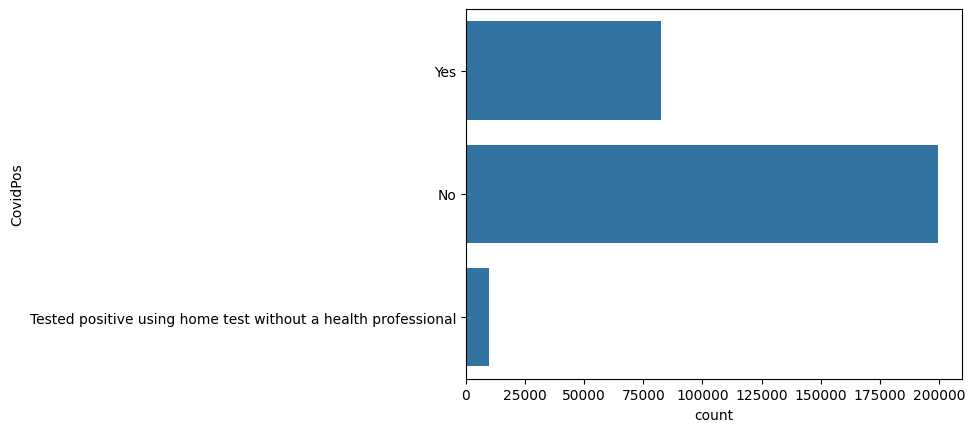

In [ ]:
#Countplot
sns.countplot(X_train['CovidPos'])

In [ ]:
#Describe
X_train['CovidPos'].describe()

count     291954
unique         3
top           No
freq      199626
Name: CovidPos, dtype: object

In [ ]:
#View missing values
X_train['CovidPos'].isna().sum()

3415

####HadHeartAttack (Y_train)

In [ ]:
#Check the occurrence of the values
Y_train.value_counts()

HadHeartAttack
No     277188
Yes     16693
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='HadHeartAttack'>

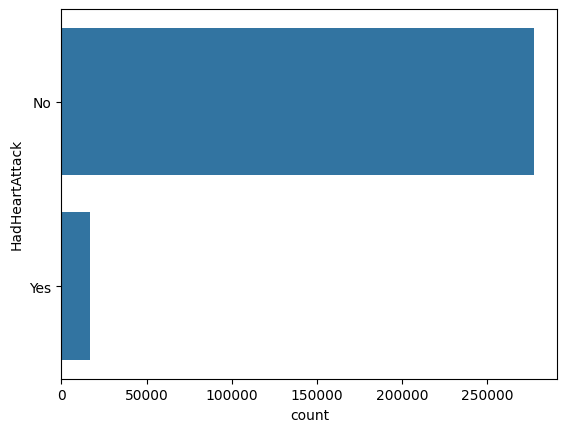

In [ ]:
#Countplot
sns.countplot(Y_train)

In [ ]:
#Describe
Y_train.describe()

count     293881
unique         2
top           No
freq      277188
Name: HadHeartAttack, dtype: object

In [ ]:
#View missing values Y_train['HadHeartAttack'].isna()
Y_train.isna().sum()

1488

##Preprocessing (Training set)

In [ ]:
X_train

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
35294,California,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.73,97.98,32.84,No,NaN,No,Yes,NaN,No,Yes
213981,Missouri,Female,Fair,15.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.55,60.78,25.32,No,No,Yes,Yes,"Yes, received Tdap",No,No
204839,Minnesota,Male,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,No,6.0,None of them,No,...,1.68,133.36,47.45,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
5447,Alaska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.75,90.72,29.53,Yes,Yes,Yes,No,NaN,No,Yes
404789,Washington,Female,Good,6.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,"6 or more, but not all",No,...,1.65,56.70,20.80,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293976,Ohio,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.85,135.62,39.45,Yes,No,No,No,"Yes, received Tdap",No,Yes
414296,Washington,Male,Very good,0.0,1.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.70,72.57,25.06,No,No,Yes,NaN,"Yes, received tetanus shot but not sure what type",No,No
149729,Maine,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.63,108.86,41.20,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
166855,Maryland,Female,Good,1.0,2.0,Within past year (anytime less than 12 months ...,Yes,NaN,"6 or more, but not all",No,...,1.57,68.04,27.44,No,Yes,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No


In [ ]:
Y_train

35294     No
213981    No
204839    No
5447      No
404789    No
          ..
293976    No
414296    No
149729    No
166855    No
138818    No
Name: HadHeartAttack, Length: 295369, dtype: object

###State

In [ ]:
#Define encoder
encoder_State = LabelEncoder()
encoder_State.fit(X_train["State"])

LabelEncoder()

In [ ]:
#Encode values
X_train["State"] = encoder_State.transform(X_train["State"])

###Sex

In [ ]:
#Define encoder
encoder_Sex = OneHotEncoder(cols='Sex', return_df=True, use_cat_names=True)
encoder_Sex.fit(X_train)

OneHotEncoder(cols=['Sex'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_Sex.transform(X_train)

In [ ]:
#Remove 'Sex_Female' column
X_train = X_train.drop(columns=['Sex_Female'])

In [ ]:
#Rename 'Sex_Male' to 'Gender'
X_train.rename(columns={'Sex_Male': 'Gender'}, inplace=True)

###GeneralHealth

In [ ]:
#Check NaN
X_train['GeneralHealth'].isna().sum()

581

In [ ]:
#Replace NaN values with the most common value (Very good)
X_train['GeneralHealth'].fillna('Very good', inplace=True)

In [ ]:
#Check NaN
X_train['GeneralHealth'].isna().sum()

0

In [ ]:
#Define encoder
#Mapping is not correct automatically
encoder_GeneralHealth = OrdinalEncoder()
encoder_GeneralHealth.fit(X_train['GeneralHealth'])

OrdinalEncoder(cols=['GeneralHealth'],
               mapping=[{'col': 'GeneralHealth', 'data_type': dtype('O'),
                         'mapping': Excellent    1
Fair         2
Good         3
Very good    4
Poor         5
NaN         -2
dtype: int64}])

In [ ]:
#Encode values
#X_train['GeneralHealth'] = encoder_GeneralHealth.transform(X_train['GeneralHealth'])

In [ ]:
#Encode them manually
X_train['GeneralHealth'].replace("Poor", 0, inplace=True)
X_train['GeneralHealth'].replace("Fair", 1, inplace=True)
X_train['GeneralHealth'].replace("Good", 2, inplace=True)
X_train['GeneralHealth'].replace("Very good", 3, inplace=True)
X_train['GeneralHealth'].replace("Excellent", 4, inplace=True)

###PhysicalHealthDays

In [ ]:
#Check NaN
X_train['PhysicalHealthDays'].isna().sum()

6022

In [ ]:
#Get the mean value (rounded as whole days)
mean_PhysicalHealthDays = round(X_train['PhysicalHealthDays'].mean())
mean_PhysicalHealthDays

4

In [ ]:
#Define imputer
imputer_PhysicalHealthDays = SimpleImputer(strategy='constant', fill_value=mean_PhysicalHealthDays)
imputer_PhysicalHealthDays = imputer_PhysicalHealthDays.fit(X_train['PhysicalHealthDays'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Impute values
X_train['PhysicalHealthDays'] = imputer_PhysicalHealthDays.transform(X_train['PhysicalHealthDays'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Convert float to int
X_train['PhysicalHealthDays'] = X_train['PhysicalHealthDays'].astype(int)

###MentalHealthDays

In [ ]:
#Check NaN
X_train['MentalHealthDays'].isna().sum()

4900

In [ ]:
#Get the mean value (rounded as whole days)
mean_MentalHealthDays = round(X_train['MentalHealthDays'].mean())
mean_MentalHealthDays

4

In [ ]:
#Define imputer
imputer_MentalHealthDays = SimpleImputer(strategy='constant', fill_value=mean_MentalHealthDays)
imputer_MentalHealthDays = imputer_MentalHealthDays.fit(X_train['MentalHealthDays'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Impute values
X_train['MentalHealthDays'] = imputer_MentalHealthDays.transform(X_train['MentalHealthDays'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_train['MentalHealthDays'].isna().sum()

0

In [ ]:
#Convert float to int
X_train['MentalHealthDays'] = X_train['MentalHealthDays'].astype(int)

###LastCheckupTime

In [ ]:
#Check NaN
X_train['LastCheckupTime'].isna().sum()

4631

In [ ]:
#Replace NaN values with the most common value (Within past year (anytime less than 12 months ago))
X_train['LastCheckupTime'].fillna('Within past year (anytime less than 12 months ago)', inplace=True)

In [ ]:
#Check NaN
X_train['LastCheckupTime'].isna().sum()

0

In [ ]:
#Encode values
#Define encoder
#Mapping is not correct automatically
encoder_LastCheckupTime = OrdinalEncoder()
encoder_LastCheckupTime.fit(X_train['LastCheckupTime'])

OrdinalEncoder(cols=['LastCheckupTime'],
               mapping=[{'col': 'LastCheckupTime', 'data_type': dtype('O'),
                         'mapping': Within past year (anytime less than 12 months ago)         1
Within past 2 years (1 year but less than 2 years ago)     2
Within past 5 years (2 years but less than 5 years ago)    3
5 or more years ago                                        4
NaN                                                       -2
dtype: int64}])

In [ ]:
#Encode them manually
X_train['LastCheckupTime'].replace("Within past year (anytime less than 12 months ago)", 0, inplace=True)
X_train['LastCheckupTime'].replace("Within past 2 years (1 year but less than 2 years ago)", 1, inplace=True)
X_train['LastCheckupTime'].replace("Within past 5 years (2 years but less than 5 years ago)", 2, inplace=True)
X_train['LastCheckupTime'].replace("5 or more years ago", 3, inplace=True)

###PhysicalActivities

In [ ]:
#Check NaN
X_train['PhysicalActivities'].isna().sum()

498

In [ ]:
#Replace NaN values with the most common value (Yes))
X_train['PhysicalActivities'].fillna('Yes', inplace=True)

In [ ]:
#Check NaN
X_train['PhysicalActivities'].isna().sum()

0

In [ ]:
#Define encoder
encoder_PhysicalActivities = OneHotEncoder(cols='PhysicalActivities', return_df=True, use_cat_names=True)
encoder_PhysicalActivities.fit(X_train)

OneHotEncoder(cols=['PhysicalActivities'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_PhysicalActivities.transform(X_train)

In [ ]:
#Remove 'PhysicalActivities_No' column
X_train = X_train.drop(columns=['PhysicalActivities_No'])

In [ ]:
#Rename 'PhysicalActivities_Yes' to 'PhysicalActivities'
X_train.rename(columns={'PhysicalActivities_Yes': 'PhysicalActivities'}, inplace=True)

###SleepHours

In [ ]:
#Check NaN
X_train['SleepHours'].isna().sum()

2784

In [ ]:
#Get the mean value (rounded as there are only whole numbers)
mean_SleepHours = round(X_train['SleepHours'].mean())
mean_SleepHours

7

In [ ]:
#Define imputer
imputer_SleepHours = SimpleImputer(strategy='constant', fill_value=mean_SleepHours)
imputer_SleepHours = imputer_SleepHours.fit(X_train['SleepHours'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Impute values
X_train['SleepHours'] = imputer_SleepHours.transform(X_train['SleepHours'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_train['SleepHours'].isna().sum()

0

In [ ]:
#Convert float to int
X_train['SleepHours'] = X_train['SleepHours'].astype(int)

In [ ]:
#Impute outliers
X_train.loc[X_train['SleepHours'] < 3, 'SleepHours'] = mean_SleepHours
X_train.loc[X_train['SleepHours'] > 12, 'SleepHours'] = mean_SleepHours

In [ ]:
X_train['SleepHours'].describe()

count    295369.000000
mean          7.024045
std           1.311545
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          12.000000
Name: SleepHours, dtype: float64

###RemovedTeeth

In [ ]:
#Check NaN
X_train['RemovedTeeth'].isna().sum()

6289

In [ ]:
#Replace NaN values with the most common value (None of them)
X_train['RemovedTeeth'].fillna('None of them', inplace=True)

In [ ]:
#Check NaN
X_train['RemovedTeeth'].isna().sum()

0

In [ ]:
#Define encoder
#Mapping is not correct automatically
encoder_RemovedTeeth = OrdinalEncoder()
encoder_RemovedTeeth.fit(X_train['RemovedTeeth'])

OrdinalEncoder(cols=['RemovedTeeth'],
               mapping=[{'col': 'RemovedTeeth', 'data_type': dtype('O'),
                         'mapping': None of them              1
6 or more, but not all    2
1 to 5                    3
All                       4
NaN                      -2
dtype: int64}])

In [ ]:
#Encode them manually
X_train['RemovedTeeth'].replace("None of them", 0, inplace=True)
X_train['RemovedTeeth'].replace("1 to 5", 1, inplace=True)
X_train['RemovedTeeth'].replace("6 or more, but not all", 2, inplace=True)
X_train['RemovedTeeth'].replace("All", 3, inplace=True)

###HadAngina

In [ ]:
#Check NaN
X_train['HadAngina'].isna().sum()

2385

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadAngina'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadAngina'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadAngina = OneHotEncoder(cols='HadAngina', return_df=True, use_cat_names=True)
encoder_HadAngina.fit(X_train)

OneHotEncoder(cols=['HadAngina'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadAngina.transform(X_train)

In [ ]:
#Remove 'HadAngina_No' column
X_train = X_train.drop(columns=['HadAngina_No'])

In [ ]:
#Rename 'HadAngina_Yes' to 'HadAngina'
X_train.rename(columns={'HadAngina_Yes': 'HadAngina'}, inplace=True)

###HadStroke

In [ ]:
#Check NaN
X_train['HadStroke'].isna().sum()

688

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadStroke'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadStroke'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadStroke = OneHotEncoder(cols='HadStroke', return_df=True, use_cat_names=True)
encoder_HadStroke.fit(X_train)

OneHotEncoder(cols=['HadStroke'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadStroke.transform(X_train)

In [ ]:
#Remove 'HadStroke_No' column
X_train = X_train.drop(columns=['HadStroke_No'])

In [ ]:
#Rename 'HadStroke_Yes' to 'HadStroke'
X_train.rename(columns={'HadStroke_Yes': 'HadStroke'}, inplace=True)

###HadAsthma

In [ ]:
#Check NaN
X_train['HadAsthma'].isna().sum()

813

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadAsthma'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadAsthma'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadAsthma = OneHotEncoder(cols='HadAsthma', return_df=True, use_cat_names=True)
encoder_HadAsthma.fit(X_train)

OneHotEncoder(cols=['HadAsthma'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadAsthma.transform(X_train)

In [ ]:
#Remove 'HadAsthma_No' column
X_train = X_train.drop(columns=['HadAsthma_No'])

In [ ]:
#Rename 'HadAsthma_Yes' to 'HadAsthma'
X_train.rename(columns={'HadAsthma_Yes': 'HadAsthma'}, inplace=True)

###HadSkinCancer

In [ ]:
#Check NaN
X_train['HadSkinCancer'].isna().sum()

1707

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadSkinCancer'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadSkinCancer'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadSkinCancer = OneHotEncoder(cols='HadSkinCancer', return_df=True, use_cat_names=True)
encoder_HadSkinCancer.fit(X_train)

OneHotEncoder(cols=['HadSkinCancer'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadSkinCancer.transform(X_train)

In [ ]:
#Remove 'HadSkinCancer_No' column
X_train = X_train.drop(columns=['HadSkinCancer_No'])

In [ ]:
#Rename 'HadSkinCancer_Yes' to 'HadSkinCancer'
X_train.rename(columns={'HadSkinCancer_Yes': 'HadSkinCancer'}, inplace=True)

###HadCOPD

In [ ]:
#Check NaN
X_train['HadCOPD'].isna().sum()

1030

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadCOPD'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadCOPD'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadCOPD = OneHotEncoder(cols='HadCOPD', return_df=True, use_cat_names=True)
encoder_HadCOPD.fit(X_train)

OneHotEncoder(cols=['HadCOPD'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadCOPD.transform(X_train)

In [ ]:
#Remove 'HadCOPD_No' column
X_train = X_train.drop(columns=['HadCOPD_No'])

In [ ]:
#Rename 'HadCOPD_Yes' to 'HadCOPD'
X_train.rename(columns={'HadCOPD_Yes': 'HadCOPD'}, inplace=True)

###HadDepressiveDisorder

In [ ]:
#Check NaN
X_train['HadDepressiveDisorder'].isna().sum()

1350

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadDepressiveDisorder'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadDepressiveDisorder'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadDepressiveDisorder = OneHotEncoder(cols='HadDepressiveDisorder', return_df=True, use_cat_names=True)
encoder_HadDepressiveDisorder.fit(X_train)

OneHotEncoder(cols=['HadDepressiveDisorder'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadDepressiveDisorder.transform(X_train)

In [ ]:
#Remove 'HadDepressiveDisorder_No' column
X_train = X_train.drop(columns=['HadDepressiveDisorder_No'])

In [ ]:
#Rename 'HadDepressiveDisorder_Yes' to 'HadDepressiveDisorder'
X_train.rename(columns={'HadDepressiveDisorder_Yes': 'HadDepressiveDisorder'}, inplace=True)

###HadKidneyDisease

In [ ]:
#Check NaN
X_train['HadKidneyDisease'].isna().sum()

906

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadKidneyDisease'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadKidneyDisease'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadKidneyDisease = OneHotEncoder(cols='HadKidneyDisease', return_df=True, use_cat_names=True)
encoder_HadKidneyDisease.fit(X_train)

OneHotEncoder(cols=['HadKidneyDisease'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadKidneyDisease.transform(X_train)

In [ ]:
#Remove 'HadKidneyDisease_No' column
X_train = X_train.drop(columns=['HadKidneyDisease_No'])

In [ ]:
#Rename 'HadKidneyDisease_Yes' to 'HadKidneyDisease'
X_train.rename(columns={'HadKidneyDisease_Yes': 'HadKidneyDisease'}, inplace=True)

###HadArthritis

In [ ]:
#Check NaN
X_train['HadArthritis'].isna().sum()

1311

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadArthritis'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadArthritis'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HadArthritis = OneHotEncoder(cols='HadArthritis', return_df=True, use_cat_names=True)
encoder_HadArthritis.fit(X_train)

OneHotEncoder(cols=['HadArthritis'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadArthritis.transform(X_train)

In [ ]:
#Remove 'HadArthritis_No' column
X_train = X_train.drop(columns=['HadArthritis_No'])

In [ ]:
#Rename 'HadArthritis_Yes' to 'HadArthritis'
X_train.rename(columns={'HadArthritis_Yes': 'HadArthritis'}, inplace=True)

###HadDiabetes

In [ ]:
#Check NaN
X_train['HadDiabetes'].isna().sum()

413

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HadDiabetes'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HadDiabetes'].isna().sum()

0

In [ ]:
X_train['HadDiabetes'].replace("No, pre-diabetes or borderline diabetes", "Yes", inplace=True)
X_train['HadDiabetes'].replace("Yes, but only during pregnancy (female)", "Yes", inplace=True)

In [ ]:
#Define encoder
encoder_HadDiabetes = OneHotEncoder(cols='HadDiabetes', return_df=True, use_cat_names=True)
encoder_HadDiabetes.fit(X_train)

OneHotEncoder(cols=['HadDiabetes'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HadDiabetes.transform(X_train)

In [ ]:
#Remove 'HadDiabetes_No' column
X_train = X_train.drop(columns=['HadDiabetes_No'])

In [ ]:
#Rename 'HadDiabetes_Yes' to 'HadDiabetes'
X_train.rename(columns={'HadDiabetes_Yes': 'HadDiabetes'}, inplace=True)

###DeafOrHardOfHearing

In [ ]:
#Check NaN
X_train['DeafOrHardOfHearing'].isna().sum()

846

In [ ]:
#Replace NaN values with the most common value (No)
X_train['DeafOrHardOfHearing'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['DeafOrHardOfHearing'].isna().sum()

0

In [ ]:
#Define encoder
encoder_DeafOrHardOfHearing = OneHotEncoder(cols='DeafOrHardOfHearing', return_df=True, use_cat_names=True)
encoder_DeafOrHardOfHearing.fit(X_train)

OneHotEncoder(cols=['DeafOrHardOfHearing'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_DeafOrHardOfHearing.transform(X_train)

In [ ]:
#Remove 'DeafOrHardOfHearing_No' column
X_train = X_train.drop(columns=['DeafOrHardOfHearing_No'])

In [ ]:
#Rename 'DeafOrHardOfHearing_Yes' to 'DeafOrHardOfHearing'
X_train.rename(columns={'DeafOrHardOfHearing_Yes': 'DeafOrHardOfHearing'}, inplace=True)

###BlindOrVisionDifficulty

In [ ]:
#Check NaN
X_train['BlindOrVisionDifficulty'].isna().sum()

666

In [ ]:
#Replace NaN values with the most common value (No)
X_train['BlindOrVisionDifficulty'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['BlindOrVisionDifficulty'].isna().sum()

0

In [ ]:
#Define encoder
encoder_BlindOrVisionDifficulty = OneHotEncoder(cols='BlindOrVisionDifficulty', return_df=True, use_cat_names=True)
encoder_BlindOrVisionDifficulty.fit(X_train)

OneHotEncoder(cols=['BlindOrVisionDifficulty'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_BlindOrVisionDifficulty.transform(X_train)

In [ ]:
#Remove 'BlindOrVisionDifficulty_No' column
X_train = X_train.drop(columns=['BlindOrVisionDifficulty_No'])

In [ ]:
#Rename 'BlindOrVisionDifficulty_Yes' to 'BlindOrVisionDifficulty'
X_train.rename(columns={'BlindOrVisionDifficulty_Yes': 'BlindOrVisionDifficulty'}, inplace=True)

###DifficultyConcentrating

In [ ]:
#Check NaN
X_train['DifficultyConcentrating'].isna().sum()

1556

In [ ]:
#Replace NaN values with the most common value (No)
X_train['DifficultyConcentrating'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['DifficultyConcentrating'].isna().sum()

0

In [ ]:
#Define encoder
encoder_DifficultyConcentrating = OneHotEncoder(cols='DifficultyConcentrating', return_df=True, use_cat_names=True)
encoder_DifficultyConcentrating.fit(X_train)

OneHotEncoder(cols=['DifficultyConcentrating'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_DifficultyConcentrating.transform(X_train)

In [ ]:
#Remove 'DifficultyConcentrating_No' column
X_train = X_train.drop(columns=['DifficultyConcentrating_No'])

In [ ]:
#Rename 'DifficultyConcentrating_Yes' to 'DifficultyConcentrating'
X_train.rename(columns={'DifficultyConcentrating_Yes': 'DifficultyConcentrating'}, inplace=True)

###DifficultyWalking

In [ ]:
#Check NaN
X_train['DifficultyWalking'].isna().sum()

818

In [ ]:
#Replace NaN values with the most common value (No)
X_train['DifficultyWalking'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['DifficultyWalking'].isna().sum()

0

In [ ]:
#Define encoder
encoder_DifficultyWalking = OneHotEncoder(cols='DifficultyWalking', return_df=True, use_cat_names=True)
encoder_DifficultyWalking.fit(X_train)

OneHotEncoder(cols=['DifficultyWalking'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_DifficultyWalking.transform(X_train)

In [ ]:
#Remove 'DifficultyWalking_No' column
X_train = X_train.drop(columns=['DifficultyWalking_No'])

In [ ]:
#Rename 'DifficultyWalking_Yes' to 'DifficultyWalking'
X_train.rename(columns={'DifficultyWalking_Yes': 'DifficultyWalking'}, inplace=True)

###DifficultyDressingBathing

In [ ]:
#Check NaN
X_train['DifficultyDressingBathing'].isna().sum()

296

In [ ]:
#Replace NaN values with the most common value (No)
X_train['DifficultyDressingBathing'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['DifficultyDressingBathing'].isna().sum()

0

In [ ]:
#Define encoder
encoder_DifficultyDressingBathing = OneHotEncoder(cols='DifficultyDressingBathing', return_df=True, use_cat_names=True)
encoder_DifficultyDressingBathing.fit(X_train)

OneHotEncoder(cols=['DifficultyDressingBathing'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_DifficultyDressingBathing.transform(X_train)

In [ ]:
#Remove 'DifficultyDressingBathing_No' column
X_train = X_train.drop(columns=['DifficultyDressingBathing_No'])

In [ ]:
#Rename 'DifficultyDressingBathing_Yes' to 'DifficultyDressingBathing'
X_train.rename(columns={'DifficultyDressingBathing_Yes': 'DifficultyDressingBathing'}, inplace=True)

###DifficultyErrands

In [ ]:
#Check NaN
X_train['DifficultyErrands'].isna().sum()

681

In [ ]:
#Replace NaN values with the most common value (No)
X_train['DifficultyErrands'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['DifficultyErrands'].isna().sum()

0

In [ ]:
#Define encoder
encoder_DifficultyErrands = OneHotEncoder(cols='DifficultyErrands', return_df=True, use_cat_names=True)
encoder_DifficultyErrands.fit(X_train)

OneHotEncoder(cols=['DifficultyErrands'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_DifficultyErrands.transform(X_train)

In [ ]:
#Remove 'DifficultyErrands_No' column
X_train = X_train.drop(columns=['DifficultyErrands_No'])

In [ ]:
#Rename 'DifficultyErrands_Yes' to 'DifficultyErrands'
X_train.rename(columns={'DifficultyErrands_Yes': 'DifficultyErrands'}, inplace=True)

###SmokerStatus

In [ ]:
#Check NaN
X_train['SmokerStatus'].isna().sum()

1759

In [ ]:
#Replace NaN values with the most common value (Never smoked)
X_train['SmokerStatus'].fillna('Never smoked', inplace=True)

In [ ]:
#Check NaN
X_train['SmokerStatus'].isna().sum()

0

In [ ]:
#Define encoder
#Mapping is not correct automatically
encoder_SmokerStatus = OrdinalEncoder()
encoder_SmokerStatus.fit(X_train['SmokerStatus'])

OrdinalEncoder(cols=['SmokerStatus'],
               mapping=[{'col': 'SmokerStatus', 'data_type': dtype('O'),
                         'mapping': Never smoked                             1
Former smoker                            2
Current smoker - now smokes every day    3
Current smoker - now smokes some days    4
NaN                                     -2
dtype: int64}])

In [ ]:
#Encode them manually
X_train['SmokerStatus'].replace("Never smoked", 0, inplace=True)
X_train['SmokerStatus'].replace("Former smoker", 1, inplace=True)
X_train['SmokerStatus'].replace("Current smoker - now smokes some days", 2, inplace=True)
X_train['SmokerStatus'].replace("Current smoker - now smokes every day", 3, inplace=True)

###ECigaretteUsage

In [ ]:
#Check NaN
X_train['ECigaretteUsage'].isna().sum()

870

In [ ]:
#Replace NaN values with the most common value (Never used e-cigarettes in my entire life)
X_train['ECigaretteUsage'].fillna('Never used e-cigarettes in my entire life', inplace=True)

In [ ]:
#Check NaN
X_train['ECigaretteUsage'].isna().sum()

0

In [ ]:
#Define encoder
#Mapping is not correct automatically
encoder_ECigaretteUsage = OrdinalEncoder()
encoder_ECigaretteUsage.fit(X_train['ECigaretteUsage'])

OrdinalEncoder(cols=['ECigaretteUsage'],
               mapping=[{'col': 'ECigaretteUsage', 'data_type': dtype('O'),
                         'mapping': Never used e-cigarettes in my entire life    1
Not at all (right now)                       2
Use them some days                           3
Use them every day                           4
NaN                                         -2
dtype: int64}])

In [ ]:
#Encode them manually
X_train['ECigaretteUsage'].replace("Never used e-cigarettes in my entire life", 0, inplace=True)
X_train['ECigaretteUsage'].replace("Not at all (right now)", 1, inplace=True)
X_train['ECigaretteUsage'].replace("Use them some days", 2, inplace=True)
X_train['ECigaretteUsage'].replace("Use them every day", 3, inplace=True)

###ChestScan

In [ ]:
#Check NaN
X_train['ChestScan'].isna().sum()

11609

In [ ]:
#Replace NaN values with the most common value (No)
X_train['ChestScan'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['ChestScan'].isna().sum()

0

In [ ]:
#Define encoder
encoder_ChestScan = OneHotEncoder(cols='ChestScan', return_df=True, use_cat_names=True)
encoder_ChestScan.fit(X_train)

OneHotEncoder(cols=['ChestScan'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_ChestScan.transform(X_train)

In [ ]:
#Remove 'ChestScan_No' column
X_train = X_train.drop(columns=['ChestScan_No'])

In [ ]:
#Rename 'ChestScan_Yes' to 'ChestScan'
X_train.rename(columns={'ChestScan_Yes': 'ChestScan'}, inplace=True)

###RaceEthnicityCategory

In [ ]:
#Check NaN
X_train['RaceEthnicityCategory'].isna().sum()

7444

In [ ]:
#Replace NaN values with the most common value (White only, Non-Hispanic)
X_train['RaceEthnicityCategory'].fillna('White only, Non-Hispanic', inplace=True)

In [ ]:
#Check NaN
X_train['RaceEthnicityCategory'].isna().sum()

0

In [ ]:
#Define encoder
encoder_RaceEthnicityCategory = LabelEncoder()
encoder_RaceEthnicityCategory.fit(X_train["RaceEthnicityCategory"])

LabelEncoder()

In [ ]:
#Encode values
X_train["RaceEthnicityCategory"] = encoder_RaceEthnicityCategory.transform(X_train["RaceEthnicityCategory"])

###AgeCategory

In [ ]:
#Check NaN
X_train['AgeCategory'].isna().sum()

3892

In [ ]:
#Replace NaN values with the most common value (White only, Non-Hispanic)
X_train['AgeCategory'].fillna('Age 65 to 69', inplace=True)

In [ ]:
#Check NaN
X_train['AgeCategory'].isna().sum()

0

In [ ]:
#Define encoder
#Mapping is not correct automatically
encoder_AgeCategory = OrdinalEncoder()
encoder_AgeCategory.fit(X_train['AgeCategory'])

OrdinalEncoder(cols=['AgeCategory'],
               mapping=[{'col': 'AgeCategory', 'data_type': dtype('O'),
                         'mapping': Age 45 to 49        1
Age 70 to 74        2
Age 55 to 59        3
Age 50 to 54        4
Age 65 to 69        5
Age 60 to 64        6
Age 80 or older     7
Age 18 to 24        8
Age 35 to 39        9
Age 25 to 29       10
Age 75 to 79       11
Age 30 to 34       12
Age 40 to 44       13
NaN                -2
dtype: int64}])

In [ ]:
#Encode them manually
X_train['AgeCategory'].replace("Age 18 to 24", 0, inplace=True)
X_train['AgeCategory'].replace("Age 25 to 29", 1, inplace=True)
X_train['AgeCategory'].replace("Age 30 to 34", 2, inplace=True)
X_train['AgeCategory'].replace("Age 35 to 39", 3, inplace=True)
X_train['AgeCategory'].replace("Age 40 to 44", 4, inplace=True)
X_train['AgeCategory'].replace("Age 45 to 49", 5, inplace=True)
X_train['AgeCategory'].replace("Age 50 to 54", 6, inplace=True)
X_train['AgeCategory'].replace("Age 55 to 59", 7, inplace=True)
X_train['AgeCategory'].replace("Age 60 to 64", 8, inplace=True)
X_train['AgeCategory'].replace("Age 65 to 69", 9, inplace=True)
X_train['AgeCategory'].replace("Age 70 to 74", 10, inplace=True)
X_train['AgeCategory'].replace("Age 75 to 79", 11, inplace=True)
X_train['AgeCategory'].replace("Age 80 or older", 12, inplace=True)

###HeightInMeters

In [ ]:
#Check NaN
X_train['HeightInMeters'].isna().sum()

5029

In [ ]:
#Define imputer
imputer_HeightInMeters = SimpleImputer(strategy='mean')
imputer_HeightInMeters = imputer_HeightInMeters.fit(X_train['HeightInMeters'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Impute values
X_train['HeightInMeters'] = imputer_HeightInMeters.transform(X_train['HeightInMeters'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_train['HeightInMeters'].isna().sum()

0

In [ ]:
#Get the mean value
mean_HeightInMeters = X_train['HeightInMeters'].mean()
mean_HeightInMeters

1.702990528346077

In [ ]:
#Impute outliers
X_train.loc[X_train['HeightInMeters'] < 1.405, 'HeightInMeters'] = mean_HeightInMeters
X_train.loc[X_train['HeightInMeters'] > 2.005, 'HeightInMeters'] = mean_HeightInMeters

In [ ]:
X_train['HeightInMeters'].describe()

count    295369.000000
mean          1.702964
std           0.103523
min           1.420000
25%           1.630000
50%           1.700000
75%           1.780000
max           2.000000
Name: HeightInMeters, dtype: float64

In [ ]:
#Round values to 2 decimal
X_train['HeightInMeters'] = round(X_train['HeightInMeters'], 2)

###WeightInKilograms

In [ ]:
#Check NaN
X_train['WeightInKilograms'].isna().sum()

13559

In [ ]:
#Define imputer
imputer_WeightInKilograms = SimpleImputer(strategy='mean')
imputer_WeightInKilograms = imputer_WeightInKilograms.fit(X_train['WeightInKilograms'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Impute values
X_train['WeightInKilograms'] = imputer_WeightInKilograms.transform(X_train['WeightInKilograms'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_train['WeightInKilograms'].isna().sum()

0

In [ ]:
#Round values to 2 decimal
X_train['WeightInKilograms'] = round(X_train['WeightInKilograms'], 2)

In [ ]:
#Get the mean value
mean_WeightInKilograms = X_train['WeightInKilograms'].mean()
mean_WeightInKilograms

83.16027497807828

In [ ]:
#Impute outliers
X_train.loc[X_train['WeightInKilograms'] < 28.56, 'WeightInKilograms'] = mean_WeightInKilograms
X_train.loc[X_train['WeightInKilograms'] > 134.73, 'WeightInKilograms'] = mean_WeightInKilograms

In [ ]:
X_train['WeightInKilograms'].describe()

count    295369.000000
mean         81.590560
std          17.943057
min          28.580000
25%          68.040000
50%          81.650000
75%          90.720000
max         134.720000
Name: WeightInKilograms, dtype: float64

In [ ]:
#Round values to 2 decimal
X_train['WeightInKilograms'] = round(X_train['WeightInKilograms'], 2)

###BMI

In [ ]:
#Check NaN
X_train['BMI'].isna().sum()

17372

In [ ]:
#Function to calculate BMI
def get_bmi(weight, height):
    bmi = weight / (height ** 2)
    return bmi

In [ ]:
#Use get_bmi function to change the BMI values
X_train['BMI'] = get_bmi(X_train['WeightInKilograms'], X_train['HeightInMeters'])

In [ ]:
#Check NaN
X_train['BMI'].isna().sum()

0

In [ ]:
#Round values to 2 decimal
X_train['BMI'] = round(X_train['BMI'], 2)

###AlcoholDrinkers

In [ ]:
#Check NaN
X_train['AlcoholDrinkers'].isna().sum()

3215

In [ ]:
#Replace NaN values with the most common value (Yes)
X_train['AlcoholDrinkers'].fillna('Yes', inplace=True)

In [ ]:
#Check NaN
X_train['AlcoholDrinkers'].isna().sum()

0

In [ ]:
#Define encoder
encoder_AlcoholDrinkers = OneHotEncoder(cols='AlcoholDrinkers', return_df=True, use_cat_names=True)
encoder_AlcoholDrinkers.fit(X_train)

OneHotEncoder(cols=['AlcoholDrinkers'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_AlcoholDrinkers.transform(X_train)

In [ ]:
#Remove 'AlcoholDrinkers_No' column
X_train = X_train.drop(columns=['AlcoholDrinkers_No'])

In [ ]:
#Rename 'AlcoholDrinkers_Yes' to 'AlcoholDrinkers'
X_train.rename(columns={'AlcoholDrinkers_Yes': 'AlcoholDrinkers'}, inplace=True)

###HIVTesting

In [ ]:
#Check NaN
X_train['HIVTesting'].isna().sum()

14123

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HIVTesting'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HIVTesting'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HIVTesting = OneHotEncoder(cols='HIVTesting', return_df=True, use_cat_names=True)
encoder_HIVTesting.fit(X_train)

OneHotEncoder(cols=['HIVTesting'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HIVTesting.transform(X_train)

In [ ]:
#Remove 'HIVTesting_No' column
X_train = X_train.drop(columns=['HIVTesting_No'])

In [ ]:
#Rename 'HIVTesting_Yes' to 'HIVTesting'
X_train.rename(columns={'HIVTesting_Yes': 'HIVTesting'}, inplace=True)

###FluVaxLast12

In [ ]:
#Check NaN
X_train['FluVaxLast12'].isna().sum()

1704

In [ ]:
#Replace NaN values with the most common value (Yes)
X_train['FluVaxLast12'].fillna('Yes', inplace=True)

In [ ]:
#Check NaN
X_train['FluVaxLast12'].isna().sum()

0

In [ ]:
#Define encoder
encoder_FluVaxLast12 = OneHotEncoder(cols='FluVaxLast12', return_df=True, use_cat_names=True)
encoder_FluVaxLast12.fit(X_train)

OneHotEncoder(cols=['FluVaxLast12'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_FluVaxLast12.transform(X_train)

In [ ]:
#Remove 'FluVaxLast12_No' column
X_train = X_train.drop(columns=['FluVaxLast12_No'])

In [ ]:
#Rename 'FluVaxLast12_Yes' to 'FluVaxLast12'
X_train.rename(columns={'FluVaxLast12_Yes': 'FluVaxLast12'}, inplace=True)

###PneumoVaxEver

In [ ]:
#Check NaN
X_train['PneumoVaxEver'].isna().sum()

22539

In [ ]:
#Replace NaN values with the most common value (No)
X_train['PneumoVaxEver'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['PneumoVaxEver'].isna().sum()

0

In [ ]:
#Define encoder
encoder_PneumoVaxEver = OneHotEncoder(cols='PneumoVaxEver', return_df=True, use_cat_names=True)
encoder_PneumoVaxEver.fit(X_train)

OneHotEncoder(cols=['PneumoVaxEver'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_PneumoVaxEver.transform(X_train)

In [ ]:
#Remove 'PneumoVaxEver_No' column
X_train = X_train.drop(columns=['PneumoVaxEver_No'])

In [ ]:
#Rename 'PneumoVaxEver_Yes' to 'PneumoVaxEver'
X_train.rename(columns={'PneumoVaxEver_Yes': 'PneumoVaxEver'}, inplace=True)

###TetanusLast10Tdap

In [ ]:
#Check NaN
X_train['TetanusLast10Tdap'].isna().sum()

26015

In [ ]:
#Replace NaN values with the most common value (No, did not receive any tetanus shot in the past 10 years)
X_train['TetanusLast10Tdap'].fillna('No, did not receive any tetanus shot in the past 10 years', inplace=True)

In [ ]:
#Check NaN
X_train['TetanusLast10Tdap'].isna().sum()

0

In [ ]:
#Encode them manually
X_train['TetanusLast10Tdap'].replace("No, did not receive any tetanus shot in the past 10 years", 0, inplace=True)
X_train['TetanusLast10Tdap'].replace("Yes, received tetanus shot but not sure what type", 1, inplace=True)
X_train['TetanusLast10Tdap'].replace("Yes, received Tdap", 1, inplace=True)
X_train['TetanusLast10Tdap'].replace("Yes, received tetanus shot, but not Tdap", 1, inplace=True)

###HighRiskLastYear

In [ ]:
#Check NaN
X_train['HighRiskLastYear'].isna().sum()

3325

In [ ]:
#Replace NaN values with the most common value (No)
X_train['HighRiskLastYear'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['HighRiskLastYear'].isna().sum()

0

In [ ]:
#Define encoder
encoder_HighRiskLastYear = OneHotEncoder(cols='HighRiskLastYear', return_df=True, use_cat_names=True)
encoder_HighRiskLastYear.fit(X_train)

OneHotEncoder(cols=['HighRiskLastYear'], use_cat_names=True)

In [ ]:
#Encode values
X_train = encoder_HighRiskLastYear.transform(X_train)

In [ ]:
#Remove 'HighRiskLastYear_No' column
X_train = X_train.drop(columns=['HighRiskLastYear_No'])

In [ ]:
#Rename 'HighRiskLastYear_Yes' to 'HighRiskLastYear'
X_train.rename(columns={'HighRiskLastYear_Yes': 'HighRiskLastYear'}, inplace=True)

###CovidPos

In [ ]:
#Check NaN
X_train['CovidPos'].isna().sum()

3415

In [ ]:
#Replace NaN values with the most common value (No)
X_train['CovidPos'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_train['CovidPos'].isna().sum()

0

In [ ]:
#Encode them manually
X_train['CovidPos'].replace("No", 0, inplace=True)
X_train['CovidPos'].replace("Yes", 1, inplace=True)
X_train['CovidPos'].replace("Tested positive using home test without a health professional", 1, inplace=True)

###HadHeartAttack (Y_train)

In [ ]:
#Check missing values
Y_train.isna().sum()

1488

In [ ]:
#Replace NaN values with the most common value (No)
Y_train.fillna('No', inplace=True)

In [ ]:
#Check missing values
Y_train.isna().sum()

0

In [ ]:
#Define encoder
encoder_HadHeartAttack = OneHotEncoder(return_df=True, use_cat_names=True)
encoder_HadHeartAttack.fit(Y_train)

OneHotEncoder(cols=['HadHeartAttack'], use_cat_names=True)

In [ ]:
#Encode values
Y_train = encoder_HadHeartAttack.transform(Y_train)

In [ ]:
#Remove 'HadHeartAttack_No' column
Y_train = Y_train.drop(columns=['HadHeartAttack_No'])

In [ ]:
#Rename 'HadHeartAttack_Yes' to 'HadHeartAttack'
Y_train.rename(columns={'HadHeartAttack_Yes': 'HadHeartAttack'}, inplace=True)

##X_train

In [ ]:
X_train

,State,Gender,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
35294,4,0,4,0,0,0,1,6,0,0,...,1.73,97.98,32.74,0,0,0,1,0,0,1
213981,26,0,1,15,0,0,1,8,0,0,...,1.55,60.78,25.30,0,0,1,1,1,0,0
204839,24,1,2,0,3,1,0,6,0,0,...,1.68,133.36,47.25,1,1,1,0,0,0,1
5447,1,1,3,0,0,0,1,6,0,0,...,1.75,90.72,29.62,1,1,1,0,0,0,1
404789,50,0,2,6,0,0,0,6,2,0,...,1.65,56.70,20.83,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293976,36,1,3,0,0,0,1,7,0,0,...,1.85,83.16,24.30,1,0,0,0,1,0,1
414296,50,1,3,0,1,0,1,7,1,0,...,1.70,72.57,25.11,0,0,1,0,1,0,0
149729,20,0,2,0,0,0,1,8,1,0,...,1.63,108.86,40.97,1,0,1,1,0,0,0
166855,21,0,2,1,2,0,1,7,2,0,...,1.57,68.04,27.60,0,1,1,1,1,0,0


##Y_train

In [ ]:
Y_train

,HadHeartAttack
35294,0
213981,0
204839,0
5447,0
404789,0
...,...
293976,0
414296,0
149729,0
166855,0


##Exploratory Data Analysis (Bivariate)

###Correlation analysis

In [ ]:
#Create a new dataframe
#Use copy to avoid attaching Y_train to X_train
df_correlation = copy.deepcopy(X_train)
df_correlation['HadHeartDisease'] = Y_train

<Axes: >

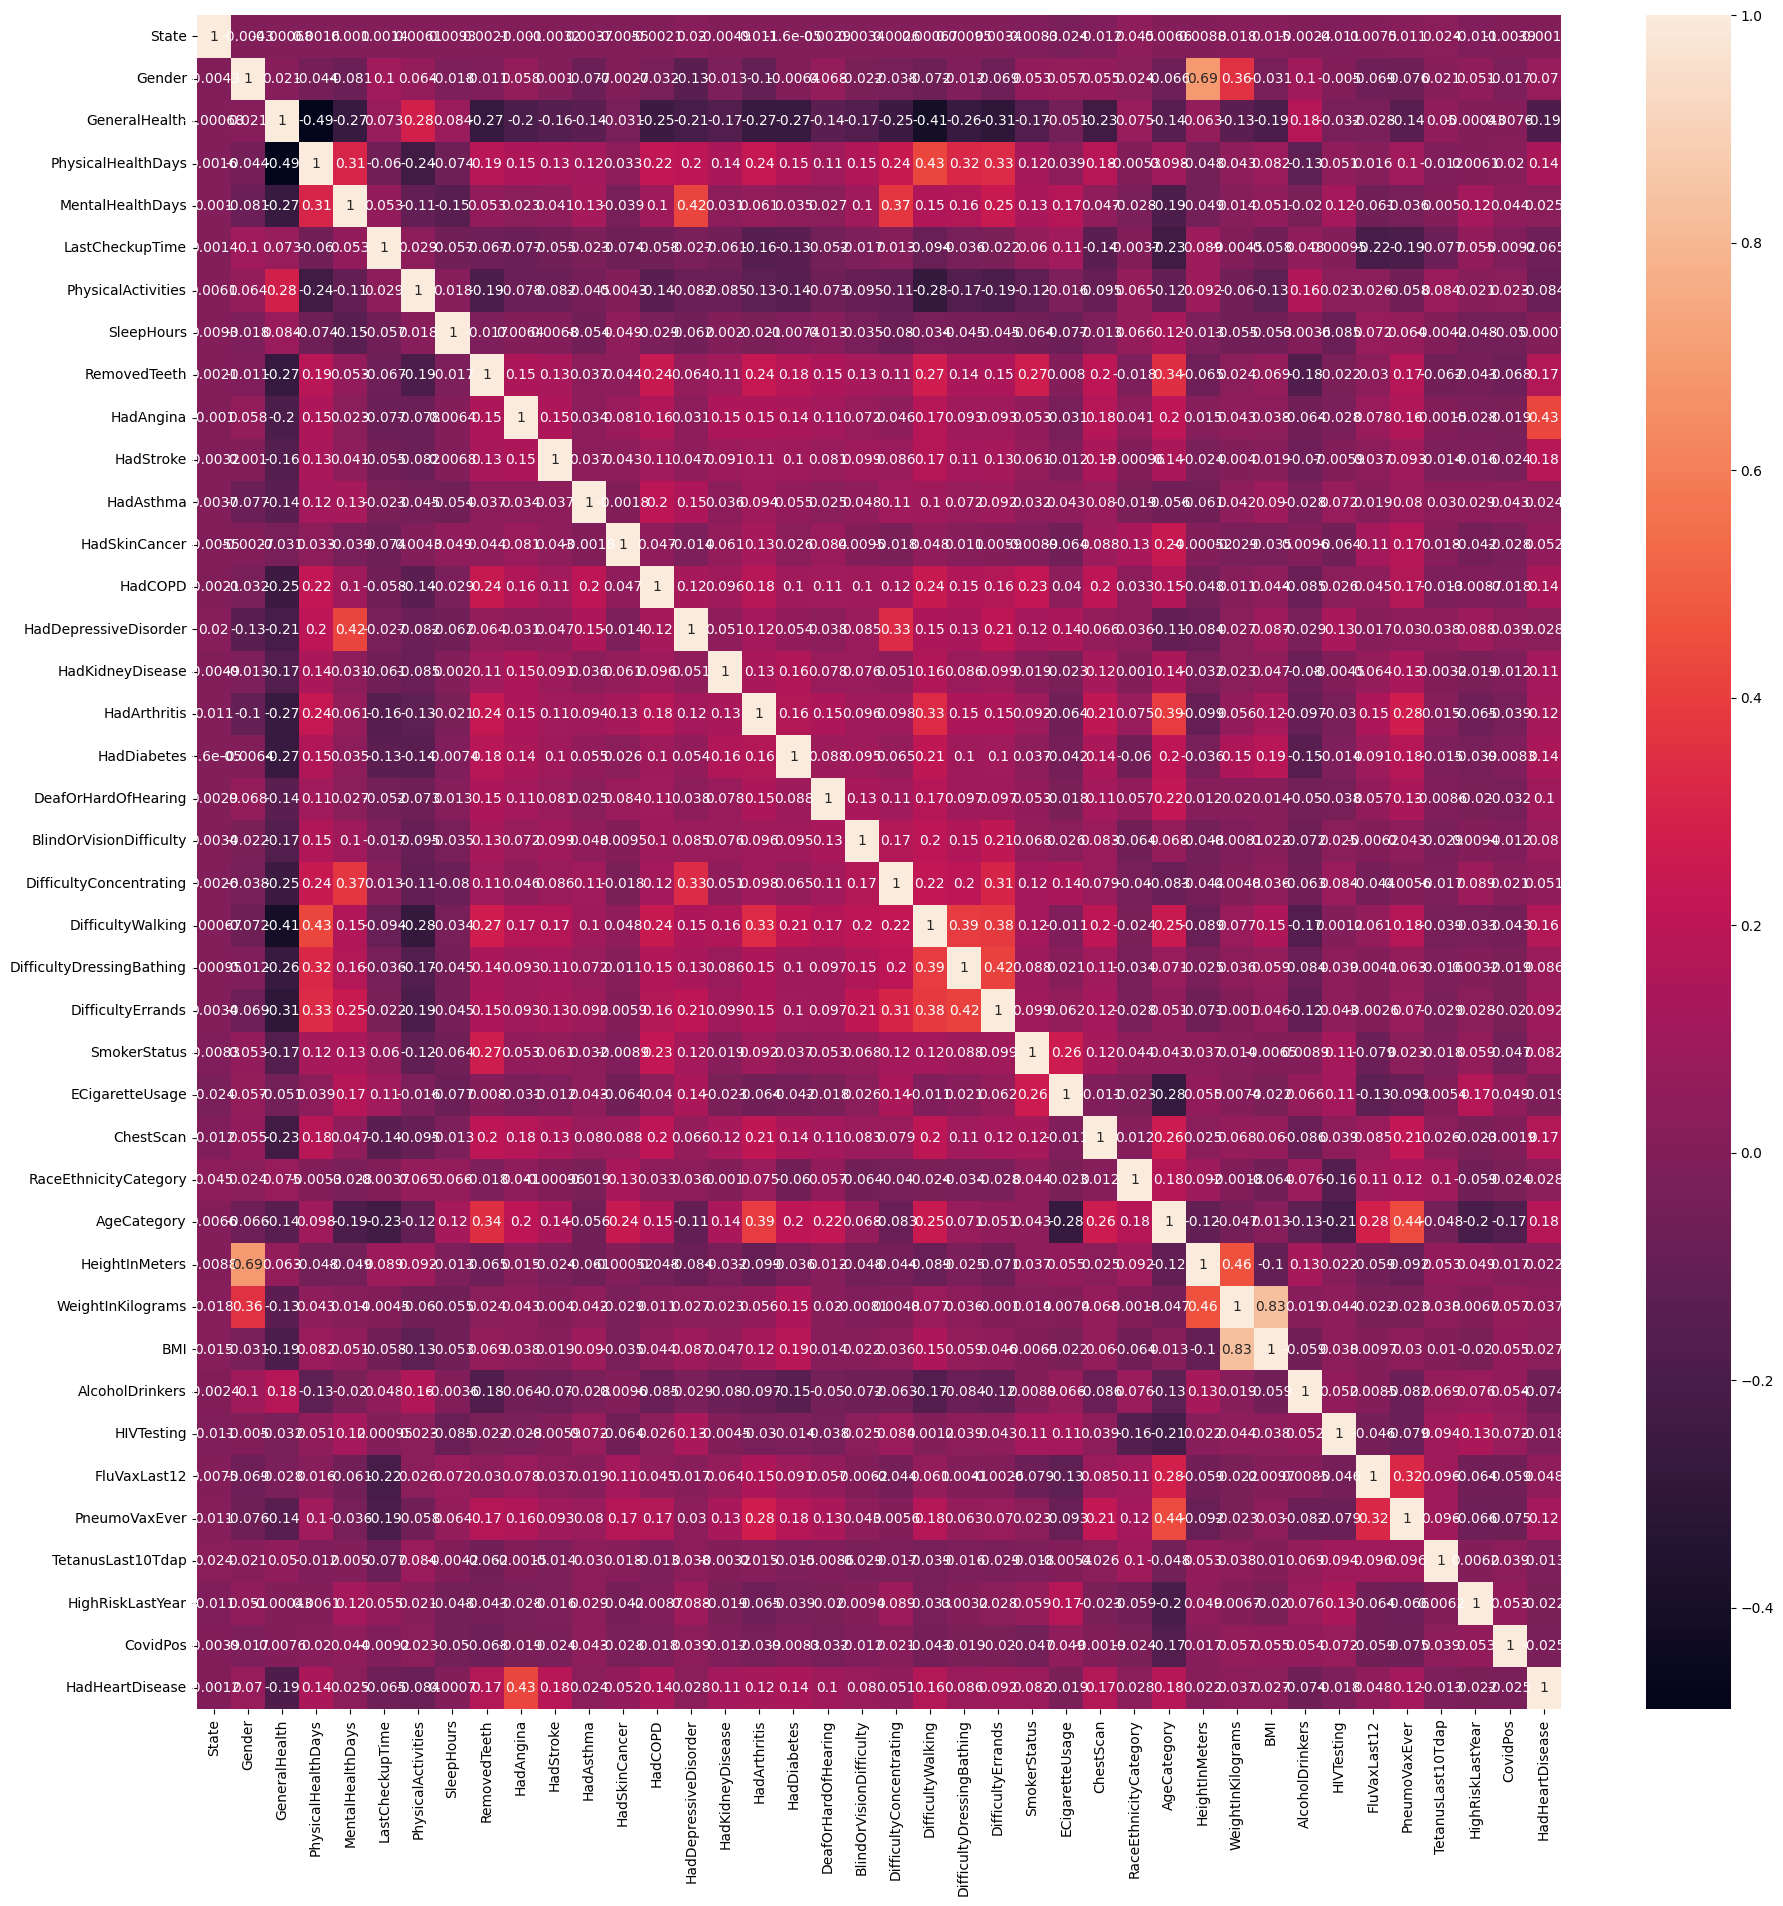

In [ ]:
#Correlation figure
plt.figure(figsize = (22,22))
sns.heatmap(df_correlation.corr(method='pearson'),annot=True)

###Bivariate analysis

<Axes: xlabel='AgeCategory', ylabel='RemovedTeeth'>

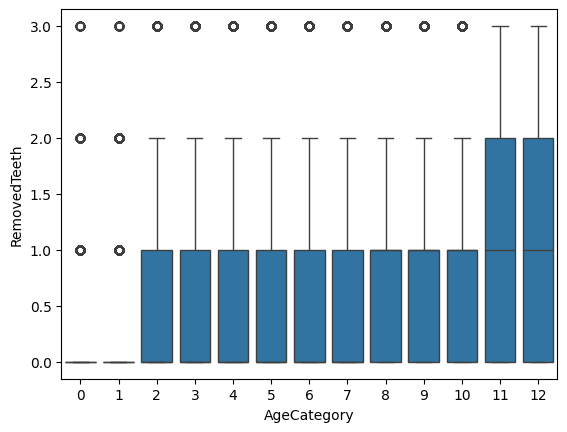

In [ ]:
#AgeCategory VS RemovedTeeth
sns.boxplot(x=df_correlation["AgeCategory"], y=df_correlation["RemovedTeeth"])

<Axes: xlabel='RemovedTeeth', ylabel='count'>

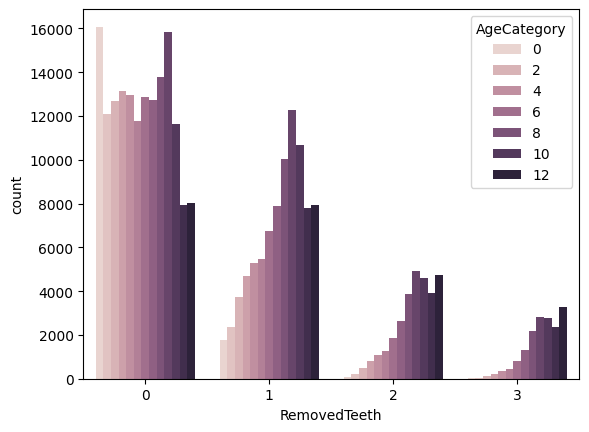

In [ ]:
#RemovedTeeth VS AgeCategory
sns.countplot(x=df_correlation["RemovedTeeth"], hue=df_correlation["AgeCategory"])

<Axes: xlabel='Gender', ylabel='count'>

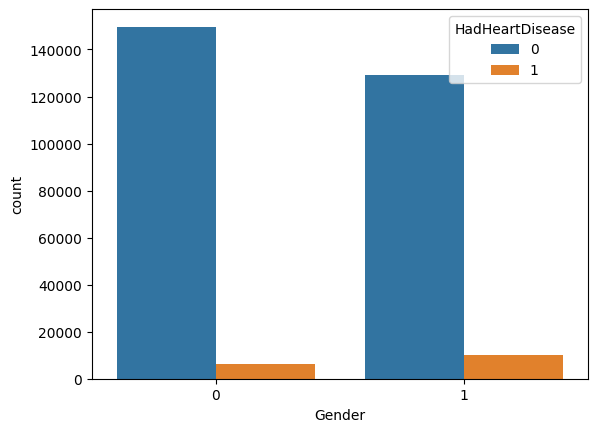

In [ ]:
#Gender VS HadHeartDisease
sns.countplot(x=df_correlation["Gender"], hue=df_correlation["HadHeartDisease"])

<Axes: xlabel='HadHeartDisease', ylabel='count'>

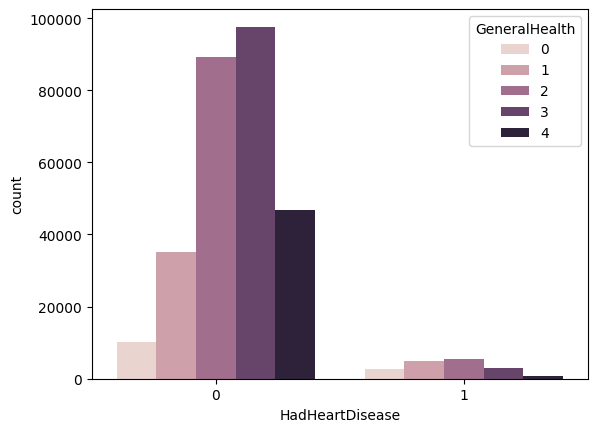

In [ ]:
#Gender VS HadHeartDisease
sns.countplot(x=df_correlation["HadHeartDisease"], hue=df_correlation["GeneralHealth"])

<Axes: xlabel='AgeCategory', ylabel='count'>

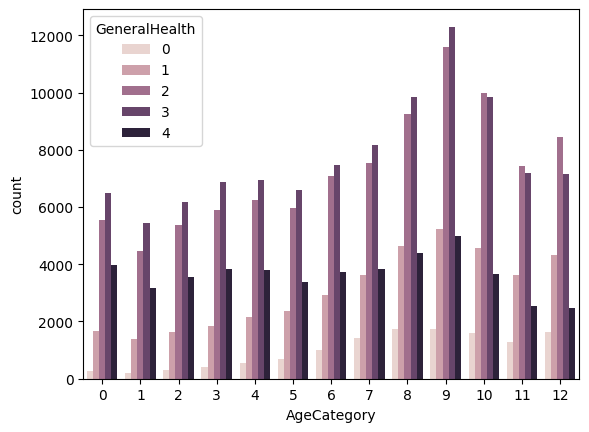

In [ ]:
#AgeCategory VS GeneralHealth
sns.countplot(x=df_correlation["AgeCategory"], hue=df_correlation["GeneralHealth"])

<Axes: xlabel='GeneralHealth', ylabel='AgeCategory'>

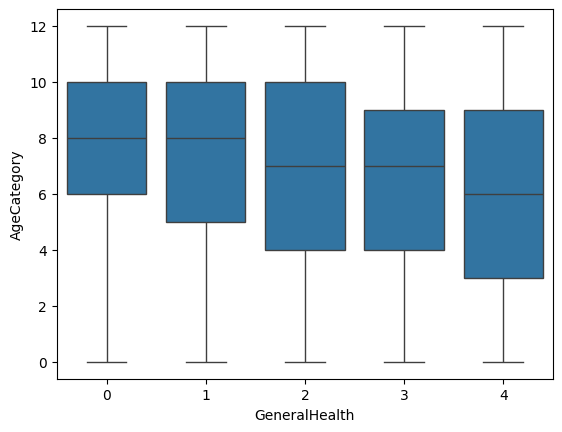

In [ ]:
#AgeCategory VS GeneralHealth
sns.boxplot(x=df_correlation["GeneralHealth"], y=df_correlation["AgeCategory"])

<Axes: xlabel='AgeCategory', ylabel='count'>

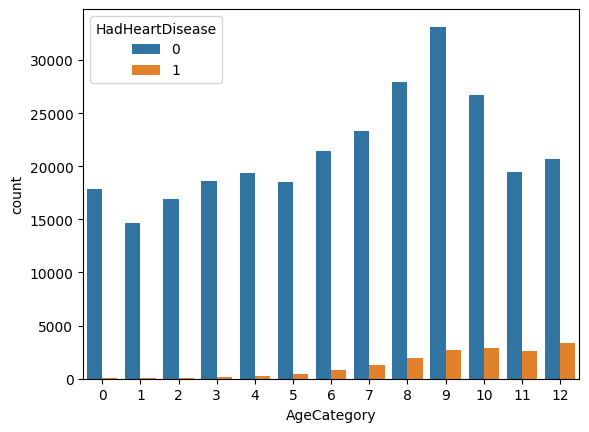

In [ ]:
#AgeCategory VS HadHeartDisease
sns.countplot(x=df_correlation["AgeCategory"], hue=df_correlation["HadHeartDisease"])

<Axes: xlabel='HadHeartDisease', ylabel='PhysicalHealthDays'>

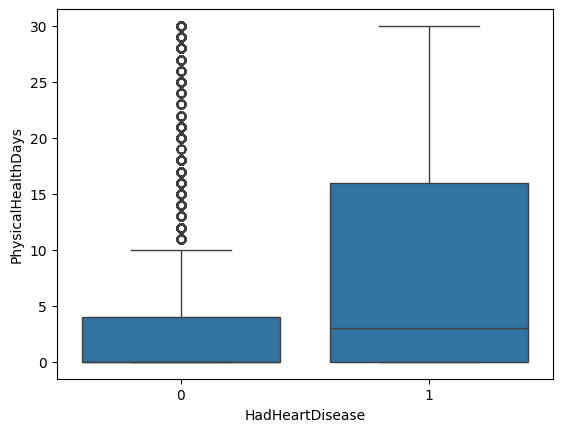

In [ ]:
#PhysicalHealthDays VS HadHeartDisease
sns.boxplot(x=df_correlation["HadHeartDisease"], y=df_correlation["PhysicalHealthDays"])

<Axes: xlabel='PhysicalActivities', ylabel='count'>

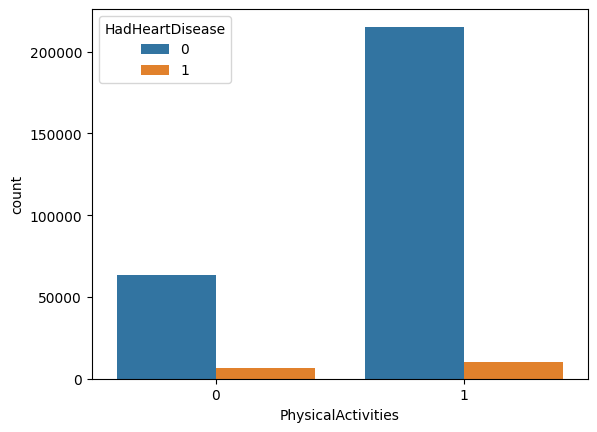

In [ ]:
#PhysicalActivities VS HadHeartDisease
sns.countplot(x=df_correlation["PhysicalActivities"], hue=df_correlation["HadHeartDisease"])

<Axes: xlabel='HadHeartDisease', ylabel='count'>

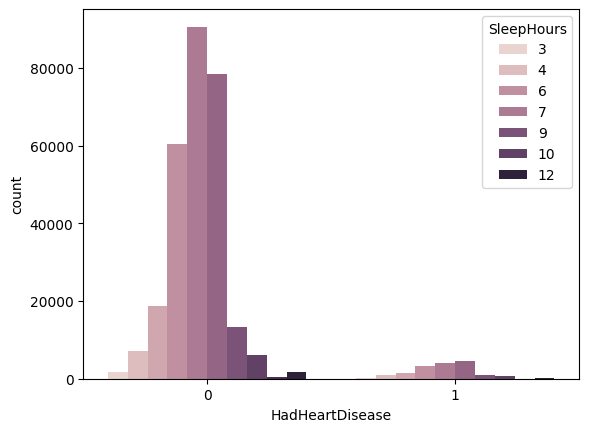

In [ ]:
#SleepHours VS HadHeartDisease
sns.countplot(x=df_correlation["HadHeartDisease"], hue=df_correlation["SleepHours"])

<Axes: xlabel='HadHeartDisease', ylabel='SleepHours'>

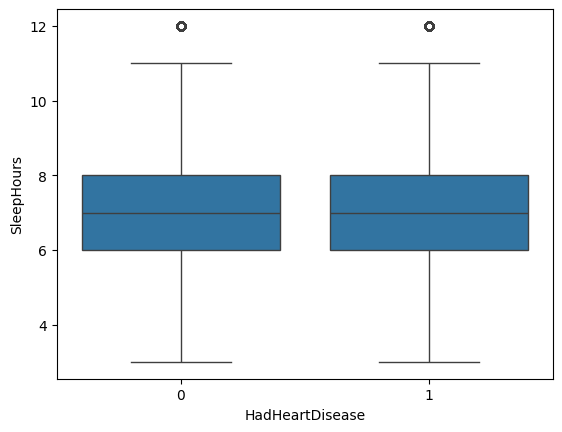

In [ ]:
#SleepHours VS HadHeartDisease
sns.boxplot(x=df_correlation["HadHeartDisease"], y=df_correlation["SleepHours"])

<Axes: xlabel='HadAngina', ylabel='count'>

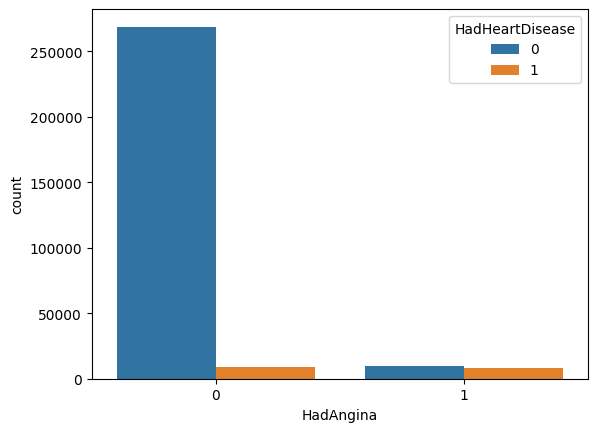

In [ ]:
#HadAngina VS HadHeartDisease
sns.countplot(x=df_correlation["HadAngina"], hue=df_correlation["HadHeartDisease"])

<Axes: xlabel='HadAngina', ylabel='count'>

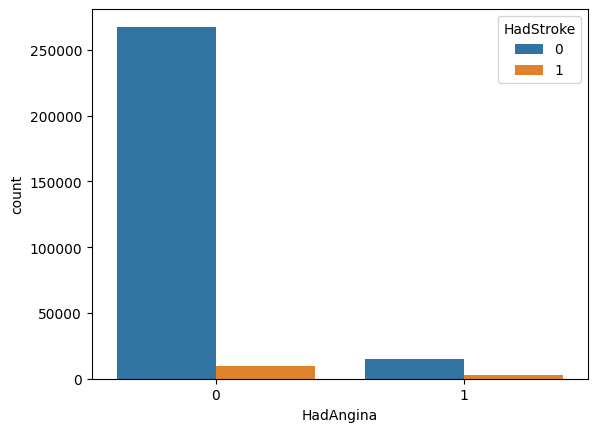

In [ ]:
#HadAngina VS HadStroke
sns.countplot(x=df_correlation["HadAngina"], hue=df_correlation["HadStroke"])

<Axes: xlabel='ChestScan', ylabel='count'>

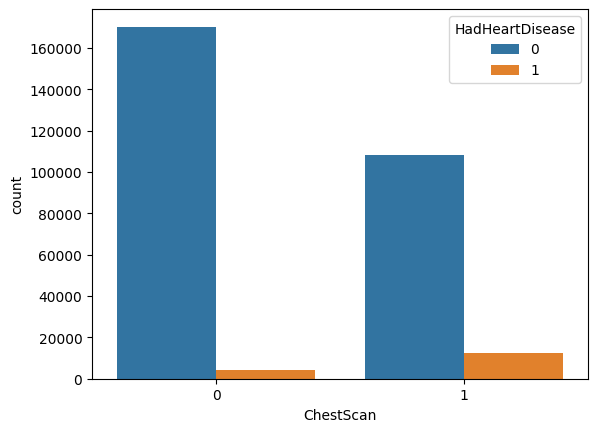

In [ ]:
#ChestScan VS HadHeartDisease
sns.countplot(x=df_correlation["ChestScan"], hue=df_correlation["HadHeartDisease"])

<Axes: xlabel='SmokerStatus', ylabel='count'>

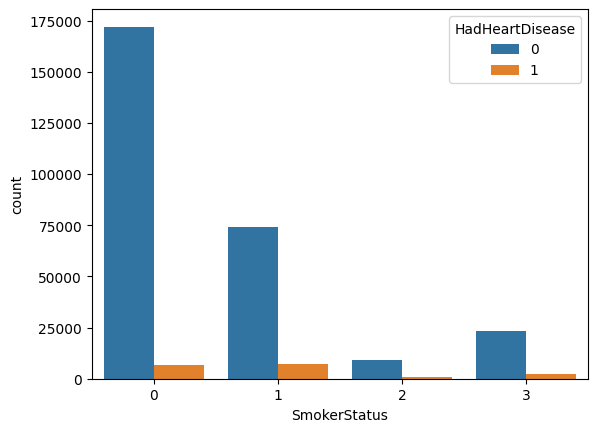

In [ ]:
#SmokerStatus VS HadHeartDisease
sns.countplot(x=df_correlation["SmokerStatus"], hue=df_correlation["HadHeartDisease"])

<Axes: xlabel='HadHeartDisease', ylabel='WeightInKilograms'>

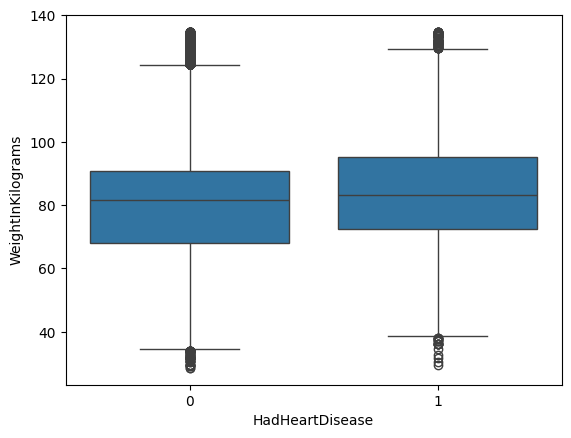

In [ ]:
#BMI VS HadHeartDisease
sns.boxplot(x=df_correlation["HadHeartDisease"], y=df_correlation["WeightInKilograms"])

<Axes: xlabel='HadHeartDisease', ylabel='HeightInMeters'>

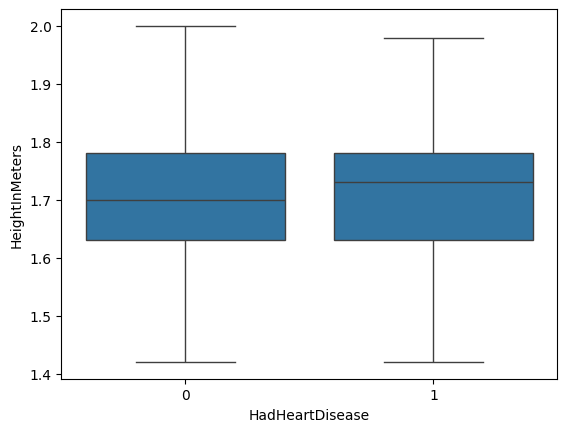

In [ ]:
#BMI VS HadHeartDisease
sns.boxplot(x=df_correlation["HadHeartDisease"], y=df_correlation["HeightInMeters"])

<Axes: xlabel='HadHeartDisease', ylabel='count'>

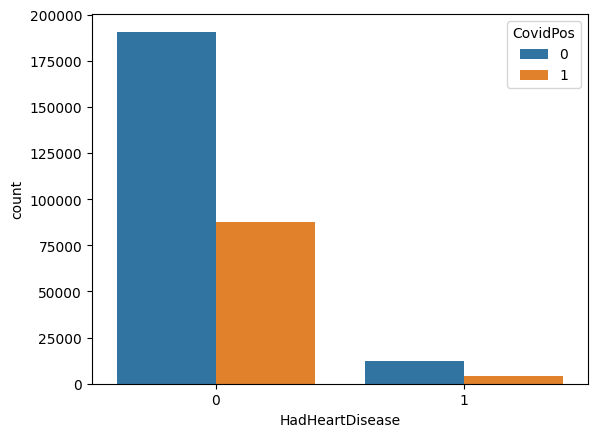

In [ ]:
#CovidPos VS HadHeartDisease
sns.countplot(x=df_correlation["HadHeartDisease"], hue=df_correlation["CovidPos"])

<Axes: xlabel='CovidPos', ylabel='count'>

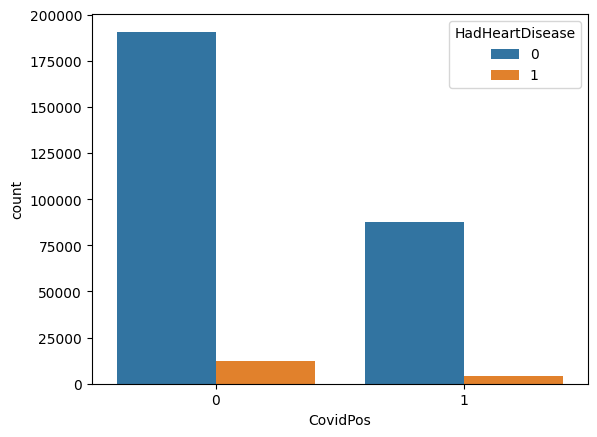

In [ ]:
#CovidPos VS HadHeartDisease
sns.countplot(x=df_correlation["CovidPos"], hue=df_correlation["HadHeartDisease"])

##Preprocessing (Testing set)

In [ ]:
X_test

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
206176,Minnesota,Female,Poor,1.0,30.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.52,49.44,21.29,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
92928,Hawaii,Male,Excellent,0.0,0.0,5 or more years ago,Yes,8.0,None of them,No,...,1.70,77.11,26.63,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
33100,California,Female,Good,4.0,6.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.65,77.11,28.29,Yes,No,Yes,NaN,"Yes, received Tdap",Yes,Tested positive using home test without a heal...
225610,Montana,Male,Very good,14.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,"6 or more, but not all",No,...,1.80,102.06,31.38,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
109285,Indiana,Male,Fair,0.0,15.0,5 or more years ago,Yes,6.0,"6 or more, but not all",No,...,1.83,47.63,14.24,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11645,Arizona,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,1.83,79.38,23.73,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
316611,Pennsylvania,Female,Very good,0.0,3.0,Within past year (anytime less than 12 months ...,Yes,1.0,"6 or more, but not all",No,...,1.63,61.23,23.17,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
435206,Wyoming,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,9.0,1 to 5,No,...,1.80,93.44,28.73,No,No,No,No,NaN,No,Yes
397731,Washington,Female,Good,10.0,10.0,Within past year (anytime less than 12 months ...,No,5.0,"6 or more, but not all",No,...,1.57,90.72,36.58,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
Y_test

206176    No
92928     No
33100     No
225610    No
109285    No
          ..
11645     No
316611    No
435206    No
397731    No
5370      No
Name: HadHeartAttack, Length: 98457, dtype: object

###State

In [ ]:
#Encode values
X_test["State"] = encoder_State.transform(X_test["State"])

###Sex

In [ ]:
#Encode values
X_test = encoder_Sex.transform(X_test)

In [ ]:
#Remove 'Sex_Female' column
X_test = X_test.drop(columns=['Sex_Female'])

In [ ]:
#Rename 'Sex_Male' to 'Gender'
X_test.rename(columns={'Sex_Male': 'Gender'}, inplace=True)

###GeneralHealth

In [ ]:
#Check NaN
X_test['GeneralHealth'].isna().sum()

171

In [ ]:
#Replace NaN values with the most common value (Very good)
X_test['GeneralHealth'].fillna('Very good', inplace=True)

In [ ]:
#Check NaN
X_test['GeneralHealth'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['GeneralHealth'].replace("Poor", 0, inplace=True)
X_test['GeneralHealth'].replace("Fair", 1, inplace=True)
X_test['GeneralHealth'].replace("Good", 2, inplace=True)
X_test['GeneralHealth'].replace("Very good", 3, inplace=True)
X_test['GeneralHealth'].replace("Excellent", 4, inplace=True)

###PhysicalHealthDays

In [ ]:
#Check NaN
X_test['PhysicalHealthDays'].isna().sum()

2060

In [ ]:
#Impute values
X_test['PhysicalHealthDays'] = imputer_PhysicalHealthDays.transform(X_test['PhysicalHealthDays'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Convert float to int
X_test['PhysicalHealthDays'] = X_test['PhysicalHealthDays'].astype(int)

In [ ]:
#Check NaN
X_test['PhysicalHealthDays'].isna().sum()

0

###MentalHealthDays

In [ ]:
#Check NaN
X_test['MentalHealthDays'].isna().sum()

1605

In [ ]:
#Impute values
X_test['MentalHealthDays'] = imputer_MentalHealthDays.transform(X_test['MentalHealthDays'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_test['MentalHealthDays'].isna().sum()

0

In [ ]:
#Convert float to int
X_test['MentalHealthDays'] = X_test['MentalHealthDays'].astype(int)

###LastCheckupTime

In [ ]:
#Check NaN
X_test['LastCheckupTime'].isna().sum()

1553

In [ ]:
#Replace NaN values with the most common value (Within past year (anytime less than 12 months ago))
X_test['LastCheckupTime'].fillna('Within past year (anytime less than 12 months ago)', inplace=True)

In [ ]:
#Check NaN
X_test['LastCheckupTime'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['LastCheckupTime'].replace("Within past year (anytime less than 12 months ago)", 0, inplace=True)
X_test['LastCheckupTime'].replace("Within past 2 years (1 year but less than 2 years ago)", 1, inplace=True)
X_test['LastCheckupTime'].replace("Within past 5 years (2 years but less than 5 years ago)", 2, inplace=True)
X_test['LastCheckupTime'].replace("5 or more years ago", 3, inplace=True)

###PhysicalActivities

In [ ]:
#Check NaN
X_test['PhysicalActivities'].isna().sum()

153

In [ ]:
#Replace NaN values with the most common value (Yes))
X_test['PhysicalActivities'].fillna('Yes', inplace=True)

In [ ]:
#Check NaN
X_test['PhysicalActivities'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_PhysicalActivities.transform(X_test)

In [ ]:
#Remove 'PhysicalActivities_No' column
X_test = X_test.drop(columns=['PhysicalActivities_No'])

In [ ]:
#Rename 'PhysicalActivities_Yes' to 'PhysicalActivities'
X_test.rename(columns={'PhysicalActivities_Yes': 'PhysicalActivities'}, inplace=True)

###SleepHours

In [ ]:
#Check NaN
X_test['SleepHours'].isna().sum()

919

In [ ]:
#Impute values
X_test['SleepHours'] = imputer_SleepHours.transform(X_test['SleepHours'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_test['SleepHours'].isna().sum()

0

In [ ]:
#Convert float to int
X_test['SleepHours'] = X_test['SleepHours'].astype(int)

In [ ]:
#Impute outliers
X_test.loc[X_test['SleepHours'] < 3, 'SleepHours'] = mean_SleepHours
X_test.loc[X_test['SleepHours'] > 12, 'SleepHours'] = mean_SleepHours

In [ ]:
X_test['SleepHours'].describe()

count    98457.000000
mean         7.025046
std          1.315053
min          3.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: SleepHours, dtype: float64

###RemovedTeeth

In [ ]:
#Check NaN
X_test['RemovedTeeth'].isna().sum()

2147

In [ ]:
#Replace NaN values with the most common value (None of them)
X_test['RemovedTeeth'].fillna('None of them', inplace=True)

In [ ]:
#Check NaN
X_test['RemovedTeeth'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['RemovedTeeth'].replace("None of them", 0, inplace=True)
X_test['RemovedTeeth'].replace("1 to 5", 1, inplace=True)
X_test['RemovedTeeth'].replace("6 or more, but not all", 2, inplace=True)
X_test['RemovedTeeth'].replace("All", 3, inplace=True)

###HadAngina

In [ ]:
#Check NaN
X_test['HadAngina'].isna().sum()

815

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadAngina'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadAngina'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadAngina.transform(X_test)

In [ ]:
#Remove 'HadAngina_No' column
X_test = X_test.drop(columns=['HadAngina_No'])

In [ ]:
#Rename 'HadAngina_Yes' to 'HadAngina'
X_test.rename(columns={'HadAngina_Yes': 'HadAngina'}, inplace=True)

###HadStroke

In [ ]:
#Check NaN
X_test['HadStroke'].isna().sum()

235

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadStroke'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadStroke'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadStroke.transform(X_test)

In [ ]:
#Remove 'HadStroke_No' column
X_test = X_test.drop(columns=['HadStroke_No'])

In [ ]:
#Rename 'HadStroke_Yes' to 'HadStroke'
X_test.rename(columns={'HadStroke_Yes': 'HadStroke'}, inplace=True)

###HadAsthma

In [ ]:
#Check NaN
X_test['HadAsthma'].isna().sum()

312

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadAsthma'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadAsthma'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadAsthma.transform(X_test)

In [ ]:
#Remove 'HadAsthma_No' column
X_test = X_test.drop(columns=['HadAsthma_No'])

In [ ]:
#Rename 'HadAsthma_Yes' to 'HadAsthma'
X_test.rename(columns={'HadAsthma_Yes': 'HadAsthma'}, inplace=True)

###HadSkinCancer

In [ ]:
#Check NaN
X_test['HadSkinCancer'].isna().sum()

606

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadSkinCancer'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadSkinCancer'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadSkinCancer.transform(X_test)

In [ ]:
#Remove 'HadSkinCancer_No' column
X_test = X_test.drop(columns=['HadSkinCancer_No'])

In [ ]:
#Rename 'HadSkinCancer_Yes' to 'HadSkinCancer'
X_test.rename(columns={'HadSkinCancer_Yes': 'HadSkinCancer'}, inplace=True)

###HadCOPD

In [ ]:
#Check NaN
X_test['HadCOPD'].isna().sum()

345

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadCOPD'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadCOPD'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadCOPD.transform(X_test)

In [ ]:
#Remove 'HadCOPD_No' column
X_test = X_test.drop(columns=['HadCOPD_No'])

In [ ]:
#Rename 'HadCOPD_Yes' to 'HadCOPD'
X_test.rename(columns={'HadCOPD_Yes': 'HadCOPD'}, inplace=True)

###HadDepressiveDisorder

In [ ]:
#Check NaN
X_test['HadDepressiveDisorder'].isna().sum()

442

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadDepressiveDisorder'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadDepressiveDisorder'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadDepressiveDisorder.transform(X_test)

In [ ]:
#Remove 'HadDepressiveDisorder_No' column
X_test = X_test.drop(columns=['HadDepressiveDisorder_No'])

In [ ]:
#Rename 'HadDepressiveDisorder_Yes' to 'HadDepressiveDisorder'
X_test.rename(columns={'HadDepressiveDisorder_Yes': 'HadDepressiveDisorder'}, inplace=True)

###HadKidneyDisease

In [ ]:
#Check NaN
X_test['HadKidneyDisease'].isna().sum()

307

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadKidneyDisease'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadKidneyDisease'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadKidneyDisease.transform(X_test)

In [ ]:
#Remove 'HadKidneyDisease_No' column
X_test = X_test.drop(columns=['HadKidneyDisease_No'])

In [ ]:
#Rename 'HadKidneyDisease_Yes' to 'HadKidneyDisease'
X_test.rename(columns={'HadKidneyDisease_Yes': 'HadKidneyDisease'}, inplace=True)

###HadArthritis

In [ ]:
#Check NaN
X_test['HadArthritis'].isna().sum()

465

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadArthritis'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadArthritis'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HadArthritis.transform(X_test)

In [ ]:
#Remove 'HadArthritis_No' column
X_test = X_test.drop(columns=['HadArthritis_No'])

In [ ]:
#Rename 'HadArthritis_Yes' to 'HadArthritis'
X_test.rename(columns={'HadArthritis_Yes': 'HadArthritis'}, inplace=True)

###HadDiabetes

In [ ]:
#Check NaN
X_test['HadDiabetes'].isna().sum()

146

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HadDiabetes'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HadDiabetes'].isna().sum()

0

In [ ]:
X_test['HadDiabetes'].replace("No, pre-diabetes or borderline diabetes", "Yes", inplace=True)
X_test['HadDiabetes'].replace("Yes, but only during pregnancy (female)", "Yes", inplace=True)

In [ ]:
#Encode values
X_test = encoder_HadDiabetes.transform(X_test)

In [ ]:
#Remove 'HadDiabetes_No' column
X_test = X_test.drop(columns=['HadDiabetes_No'])

In [ ]:
#Rename 'HadDiabetes_Yes' to 'HadDiabetes'
X_test.rename(columns={'HadDiabetes_Yes': 'HadDiabetes'}, inplace=True)

###DeafOrHardOfHearing

In [ ]:
#Check NaN
X_test['DeafOrHardOfHearing'].isna().sum()

281

In [ ]:
#Replace NaN values with the most common value (No)
X_test['DeafOrHardOfHearing'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['DeafOrHardOfHearing'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_DeafOrHardOfHearing.transform(X_test)

In [ ]:
#Remove 'DeafOrHardOfHearing_No' column
X_test = X_test.drop(columns=['DeafOrHardOfHearing_No'])

In [ ]:
#Rename 'DeafOrHardOfHearing_Yes' to 'DeafOrHardOfHearing'
X_test.rename(columns={'DeafOrHardOfHearing_Yes': 'DeafOrHardOfHearing'}, inplace=True)

###BlindOrVisionDifficulty

In [ ]:
#Check NaN
X_test['BlindOrVisionDifficulty'].isna().sum()

237

In [ ]:
#Replace NaN values with the most common value (No)
X_test['BlindOrVisionDifficulty'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['BlindOrVisionDifficulty'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_BlindOrVisionDifficulty.transform(X_test)

In [ ]:
#Remove 'BlindOrVisionDifficulty_No' column
X_test = X_test.drop(columns=['BlindOrVisionDifficulty_No'])

In [ ]:
#Rename 'BlindOrVisionDifficulty_Yes' to 'BlindOrVisionDifficulty'
X_test.rename(columns={'BlindOrVisionDifficulty_Yes': 'BlindOrVisionDifficulty'}, inplace=True)

###DifficultyConcentrating

In [ ]:
#Check NaN
X_test['DifficultyConcentrating'].isna().sum()

533

In [ ]:
#Replace NaN values with the most common value (No)
X_test['DifficultyConcentrating'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['DifficultyConcentrating'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_DifficultyConcentrating.transform(X_test)

In [ ]:
#Remove 'DifficultyConcentrating_No' column
X_test = X_test.drop(columns=['DifficultyConcentrating_No'])

In [ ]:
#Rename 'DifficultyConcentrating_Yes' to 'DifficultyConcentrating'
X_test.rename(columns={'DifficultyConcentrating_Yes': 'DifficultyConcentrating'}, inplace=True)

###DifficultyWalking

In [ ]:
#Check NaN
X_test['DifficultyWalking'].isna().sum()

262

In [ ]:
#Replace NaN values with the most common value (No)
X_test['DifficultyWalking'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['DifficultyWalking'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_DifficultyWalking.transform(X_test)

In [ ]:
#Remove 'DifficultyWalking_No' column
X_test = X_test.drop(columns=['DifficultyWalking_No'])

In [ ]:
#Rename 'DifficultyWalking_Yes' to 'DifficultyWalking'
X_test.rename(columns={'DifficultyWalking_Yes': 'DifficultyWalking'}, inplace=True)

###DifficultyDressingBathing

In [ ]:
#Check NaN
X_test['DifficultyDressingBathing'].isna().sum()

100

In [ ]:
#Replace NaN values with the most common value (No)
X_test['DifficultyDressingBathing'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['DifficultyDressingBathing'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_DifficultyDressingBathing.transform(X_test)

In [ ]:
#Remove 'DifficultyDressingBathing_No' column
X_test = X_test.drop(columns=['DifficultyDressingBathing_No'])

In [ ]:
#Rename 'DifficultyDressingBathing_Yes' to 'DifficultyDressingBathing'
X_test.rename(columns={'DifficultyDressingBathing_Yes': 'DifficultyDressingBathing'}, inplace=True)

###DifficultyErrands

In [ ]:
#Check NaN
X_test['DifficultyErrands'].isna().sum()

210

In [ ]:
#Replace NaN values with the most common value (No)
X_test['DifficultyErrands'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['DifficultyErrands'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_DifficultyErrands.transform(X_test)

In [ ]:
#Remove 'DifficultyErrands_No' column
X_test = X_test.drop(columns=['DifficultyErrands_No'])

In [ ]:
#Rename 'DifficultyErrands_Yes' to 'DifficultyErrands'
X_test.rename(columns={'DifficultyErrands_Yes': 'DifficultyErrands'}, inplace=True)

###SmokerStatus

In [ ]:
#Check NaN
X_test['SmokerStatus'].isna().sum()

621

In [ ]:
#Replace NaN values with the most common value (Never smoked)
X_test['SmokerStatus'].fillna('Never smoked', inplace=True)

In [ ]:
#Check NaN
X_test['SmokerStatus'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['SmokerStatus'].replace("Never smoked", 0, inplace=True)
X_test['SmokerStatus'].replace("Former smoker", 1, inplace=True)
X_test['SmokerStatus'].replace("Current smoker - now smokes some days", 2, inplace=True)
X_test['SmokerStatus'].replace("Current smoker - now smokes every day", 3, inplace=True)

###ECigaretteUsage

In [ ]:
#Check NaN
X_test['ECigaretteUsage'].isna().sum()

255

In [ ]:
#Replace NaN values with the most common value (Never used e-cigarettes in my entire life)
X_test['ECigaretteUsage'].fillna('Never used e-cigarettes in my entire life', inplace=True)

In [ ]:
#Check NaN
X_test['ECigaretteUsage'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['ECigaretteUsage'].replace("Never used e-cigarettes in my entire life", 0, inplace=True)
X_test['ECigaretteUsage'].replace("Not at all (right now)", 1, inplace=True)
X_test['ECigaretteUsage'].replace("Use them some days", 2, inplace=True)
X_test['ECigaretteUsage'].replace("Use them every day", 3, inplace=True)

###ChestScan

In [ ]:
#Check NaN
X_test['ChestScan'].isna().sum()

3915

In [ ]:
#Replace NaN values with the most common value (No)
X_test['ChestScan'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['ChestScan'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_ChestScan.transform(X_test)

In [ ]:
#Remove 'ChestScan_No' column
X_test = X_test.drop(columns=['ChestScan_No'])

In [ ]:
#Rename 'ChestScan_Yes' to 'ChestScan'
X_test.rename(columns={'ChestScan_Yes': 'ChestScan'}, inplace=True)

###RaceEthnicityCategory

In [ ]:
#Check NaN
X_test['RaceEthnicityCategory'].isna().sum()

2421

In [ ]:
#Replace NaN values with the most common value (White only, Non-Hispanic)
X_test['RaceEthnicityCategory'].fillna('White only, Non-Hispanic', inplace=True)

In [ ]:
#Check NaN
X_test['RaceEthnicityCategory'].isna().sum()

0

In [ ]:
#Encode values
X_test["RaceEthnicityCategory"] = encoder_RaceEthnicityCategory.transform(X_test["RaceEthnicityCategory"])

###AgeCategory

In [ ]:
#Check NaN
X_test['AgeCategory'].isna().sum()

1279

In [ ]:
#Replace NaN values with the most common value (White only, Non-Hispanic)
X_test['AgeCategory'].fillna('Age 65 to 69', inplace=True)

In [ ]:
#Check NaN
X_test['AgeCategory'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['AgeCategory'].replace("Age 18 to 24", 0, inplace=True)
X_test['AgeCategory'].replace("Age 25 to 29", 1, inplace=True)
X_test['AgeCategory'].replace("Age 30 to 34", 2, inplace=True)
X_test['AgeCategory'].replace("Age 35 to 39", 3, inplace=True)
X_test['AgeCategory'].replace("Age 40 to 44", 4, inplace=True)
X_test['AgeCategory'].replace("Age 45 to 49", 5, inplace=True)
X_test['AgeCategory'].replace("Age 50 to 54", 6, inplace=True)
X_test['AgeCategory'].replace("Age 55 to 59", 7, inplace=True)
X_test['AgeCategory'].replace("Age 60 to 64", 8, inplace=True)
X_test['AgeCategory'].replace("Age 65 to 69", 9, inplace=True)
X_test['AgeCategory'].replace("Age 70 to 74", 10, inplace=True)
X_test['AgeCategory'].replace("Age 75 to 79", 11, inplace=True)
X_test['AgeCategory'].replace("Age 80 or older", 12, inplace=True)

###HeightInMeters

In [ ]:
#Check NaN
X_test['HeightInMeters'].isna().sum()

1599

In [ ]:
#Impute values
X_test['HeightInMeters'] = imputer_HeightInMeters.transform(X_test['HeightInMeters'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_test['HeightInMeters'].isna().sum()

0

In [ ]:
#Round values to 2 decimal
X_test['HeightInMeters'] = round(X_test['HeightInMeters'], 2)

In [ ]:
#Impute outliers
X_test.loc[X_test['HeightInMeters'] < 1.405, 'HeightInMeters'] = mean_HeightInMeters
X_test.loc[X_test['HeightInMeters'] > 2.005, 'HeightInMeters'] = mean_HeightInMeters

In [ ]:
X_test['HeightInMeters'].describe()

count    98457.000000
mean         1.703035
std          0.103452
min          1.420000
25%          1.630000
50%          1.700000
75%          1.780000
max          2.000000
Name: HeightInMeters, dtype: float64

###WeightInKilograms

In [ ]:
#Check NaN
X_test['WeightInKilograms'].isna().sum()

4456

In [ ]:
#Impute values
X_test['WeightInKilograms'] = imputer_WeightInKilograms.transform(X_test['WeightInKilograms'].values.reshape(-1,1)) #Reshape to 2D array

In [ ]:
#Check NaN
X_test['WeightInKilograms'].isna().sum()

0

In [ ]:
#Impute outliers
X_test.loc[X_test['WeightInKilograms'] < 28.56, 'WeightInKilograms'] = mean_WeightInKilograms
X_test.loc[X_test['WeightInKilograms'] > 134.73, 'WeightInKilograms'] = mean_WeightInKilograms

In [ ]:
X_test['WeightInKilograms'].describe()

count    98457.000000
mean        81.781398
std         17.968550
min         28.580000
25%         68.040000
50%         81.650000
75%         90.720000
max        134.720000
Name: WeightInKilograms, dtype: float64

In [ ]:
#Round values to 2 decimal
X_test['WeightInKilograms'] = round(X_test['WeightInKilograms'], 2)

###BMI

In [ ]:
#Check NaN
X_test['BMI'].isna().sum()

5694

In [ ]:
#Use get_bmi function to change the BMI values
X_test['BMI'] = get_bmi(X_test['WeightInKilograms'], X_test['HeightInMeters'])

In [ ]:
#Check NaN
X_test['BMI'].isna().sum()

0

In [ ]:
#Round values to 2 decimal
X_test['BMI'] = round(X_test['BMI'], 2)

###AlcoholDrinkers

In [ ]:
#Check NaN
X_test['AlcoholDrinkers'].isna().sum()

1053

In [ ]:
#Replace NaN values with the most common value (Yes)
X_test['AlcoholDrinkers'].fillna('Yes', inplace=True)

In [ ]:
#Check NaN
X_test['AlcoholDrinkers'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_AlcoholDrinkers.transform(X_test)

In [ ]:
#Remove 'AlcoholDrinkers_No' column
X_test = X_test.drop(columns=['AlcoholDrinkers_No'])

In [ ]:
#Rename 'AlcoholDrinkers_Yes' to 'AlcoholDrinkers'
X_test.rename(columns={'AlcoholDrinkers_Yes': 'AlcoholDrinkers'}, inplace=True)

###HIVTesting

In [ ]:
#Check NaN
X_test['HIVTesting'].isna().sum()

4874

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HIVTesting'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HIVTesting'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HIVTesting.transform(X_test)

In [ ]:
#Remove 'HIVTesting_No' column
X_test = X_test.drop(columns=['HIVTesting_No'])

In [ ]:
#Rename 'HIVTesting_Yes' to 'HIVTesting'
X_test.rename(columns={'HIVTesting_Yes': 'HIVTesting'}, inplace=True)

###FluVaxLast12

In [ ]:
#Check NaN
X_test['FluVaxLast12'].isna().sum()

611

In [ ]:
#Replace NaN values with the most common value (Yes)
X_test['FluVaxLast12'].fillna('Yes', inplace=True)

In [ ]:
#Check NaN
X_test['FluVaxLast12'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_FluVaxLast12.transform(X_test)

In [ ]:
#Remove 'FluVaxLast12_No' column
X_test = X_test.drop(columns=['FluVaxLast12_No'])

In [ ]:
#Rename 'FluVaxLast12_Yes' to 'FluVaxLast12'
X_test.rename(columns={'FluVaxLast12_Yes': 'FluVaxLast12'}, inplace=True)

###PneumoVaxEver

In [ ]:
#Check NaN
X_test['PneumoVaxEver'].isna().sum()

7476

In [ ]:
#Replace NaN values with the most common value (No)
X_test['PneumoVaxEver'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['PneumoVaxEver'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_PneumoVaxEver.transform(X_test)

In [ ]:
#Remove 'PneumoVaxEver_No' column
X_test = X_test.drop(columns=['PneumoVaxEver_No'])

In [ ]:
#Rename 'PneumoVaxEver_Yes' to 'PneumoVaxEver'
X_test.rename(columns={'PneumoVaxEver_Yes': 'PneumoVaxEver'}, inplace=True)

###TetanusLast10Tdap

In [ ]:
#Check NaN
X_test['TetanusLast10Tdap'].isna().sum()

8724

In [ ]:
#Replace NaN values with the most common value (No, did not receive any tetanus shot in the past 10 years)
X_test['TetanusLast10Tdap'].fillna('No, did not receive any tetanus shot in the past 10 years', inplace=True)

In [ ]:
#Check NaN
X_test['TetanusLast10Tdap'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['TetanusLast10Tdap'].replace("No, did not receive any tetanus shot in the past 10 years", 0, inplace=True)
X_test['TetanusLast10Tdap'].replace("Yes, received tetanus shot but not sure what type", 1, inplace=True)
X_test['TetanusLast10Tdap'].replace("Yes, received Tdap", 1, inplace=True)
X_test['TetanusLast10Tdap'].replace("Yes, received tetanus shot, but not Tdap", 1, inplace=True)

###HighRiskLastYear

In [ ]:
#Check NaN
X_test['HighRiskLastYear'].isna().sum()

1126

In [ ]:
#Replace NaN values with the most common value (No)
X_test['HighRiskLastYear'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['HighRiskLastYear'].isna().sum()

0

In [ ]:
#Encode values
X_test = encoder_HighRiskLastYear.transform(X_test)

In [ ]:
#Remove 'HighRiskLastYear_No' column
X_test = X_test.drop(columns=['HighRiskLastYear_No'])

In [ ]:
#Rename 'HighRiskLastYear_Yes' to 'HighRiskLastYear'
X_test.rename(columns={'HighRiskLastYear_Yes': 'HighRiskLastYear'}, inplace=True)

###CovidPos

In [ ]:
#Check NaN
X_test['CovidPos'].isna().sum()

1177

In [ ]:
#Replace NaN values with the most common value (No)
X_test['CovidPos'].fillna('No', inplace=True)

In [ ]:
#Check NaN
X_test['CovidPos'].isna().sum()

0

In [ ]:
#Encode them manually
X_test['CovidPos'].replace("No", 0, inplace=True)
X_test['CovidPos'].replace("Yes", 1, inplace=True)
X_test['CovidPos'].replace("Tested positive using home test without a health professional", 1, inplace=True)

###HadHeartAttack (Y_test)

In [ ]:
#Check missing values
Y_test.isna().sum()

492

In [ ]:
#Replace NaN values with the most common value (No)
Y_test.fillna('No', inplace=True)

In [ ]:
#Check missing values
Y_test.isna().sum()

0

In [ ]:
#Encode values
Y_test = encoder_HadHeartAttack.transform(Y_test)

In [ ]:
#Remove 'HadHeartAttack_No' column
Y_test = Y_test.drop(columns=['HadHeartAttack_No'])

In [ ]:
#Rename 'HadHeartAttack_Yes' to 'HadHeartAttack'
Y_test.rename(columns={'HadHeartAttack_Yes': 'HadHeartAttack'}, inplace=True)

##X_test

In [ ]:
X_test

,State,Gender,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
206176,24,0,0,1,30,0,1,6,0,0,...,1.52,49.44,21.40,1,1,0,1,1,0,1
92928,12,1,4,0,0,3,1,8,0,0,...,1.70,77.11,26.68,0,0,0,0,1,0,0
33100,4,0,2,4,6,0,1,7,0,0,...,1.65,77.11,28.32,1,0,1,0,1,1,1
225610,27,1,3,14,0,1,1,6,2,0,...,1.80,102.06,31.50,0,1,1,1,0,0,0
109285,15,1,1,0,15,3,1,6,2,0,...,1.83,47.63,14.22,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11645,2,1,2,0,0,0,0,6,0,0,...,1.83,79.38,23.70,0,0,1,1,0,0,0
316611,39,0,3,0,3,0,1,7,2,0,...,1.63,61.23,23.05,0,0,1,1,1,0,0
435206,53,1,3,0,0,0,0,9,1,0,...,1.80,93.44,28.84,0,0,0,0,0,0,1
397731,50,0,2,10,10,0,0,5,2,0,...,1.57,90.72,36.80,0,0,1,1,0,0,0


##Y_test

In [ ]:
Y_test

,HadHeartAttack
206176,0
92928,0
33100,0
225610,0
109285,0
...,...
11645,0
316611,0
435206,0
397731,0


##Undersampling

In [ ]:
#Random under sampler
undersampler = RandomUnderSampler(random_state=42)

#Resample sets
X_train_undersampled, Y_train_undersampled = undersampler.fit_resample(X_train, Y_train)

In [ ]:
#Countplot
X_train.describe()

,State,Gender,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,...,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000,295369.000000
mean,27.501732,0.471461,2.439281,4.352109,4.394523,0.336335,0.763685,7.024045,0.669603,0.060562,...,1.702902,81.590554,28.100214,0.534741,0.324377,0.528783,0.382742,0.606821,0.043251,0.312585
std,15.523519,0.499186,1.047414,8.594601,8.304545,0.771385,0.424818,1.311545,0.876169,0.238525,...,0.103524,17.943057,5.627496,0.498792,0.468143,0.499172,0.486057,0.488457,0.203422,0.463548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,1.420000,28.580000,7.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,...,1.630000,68.040000,24.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,...,1.700000,81.650000,27.400000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,42.000000,1.000000,3.000000,4.000000,4.000000,0.000000,1.000000,8.000000,1.000000,0.000000,...,1.780000,90.720000,31.300000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,53.000000,1.000000,4.000000,30.000000,30.000000,3.000000,1.000000,12.000000,3.000000,1.000000,...,2.000000,134.720000,62.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Countplot
X_train_undersampled.describe()

,State,Gender,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,...,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000,33386.000000
mean,27.572515,0.537770,2.067244,6.607051,4.791320,0.239382,0.695591,7.014168,0.950249,0.255826,...,1.707019,82.858225,28.394844,0.463727,0.309860,0.575810,0.497843,0.595489,0.035075,0.288384
std,15.589931,0.498579,1.134269,10.520391,8.934151,0.666781,0.460164,1.457606,1.015388,0.436331,...,0.103482,18.120512,5.643256,0.498690,0.462443,0.494227,0.500003,0.490804,0.183971,0.453018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,1.420000,29.480000,9.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,1.630000,70.310000,24.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000,...,1.700000,82.550000,27.790000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,42.000000,1.000000,3.000000,8.000000,5.000000,0.000000,1.000000,8.000000,2.000000,1.000000,...,1.780000,93.440000,31.650000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,53.000000,1.000000,4.000000,30.000000,30.000000,3.000000,1.000000,12.000000,3.000000,1.000000,...,2.000000,134.720000,60.410000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='HadAngina', ylabel='count'>

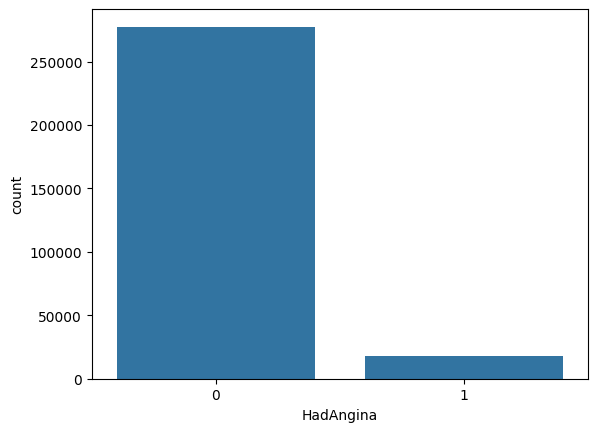

In [ ]:
#Countplot
sns.countplot(x=X_train['HadAngina'])

<Axes: xlabel='HadAngina', ylabel='count'>

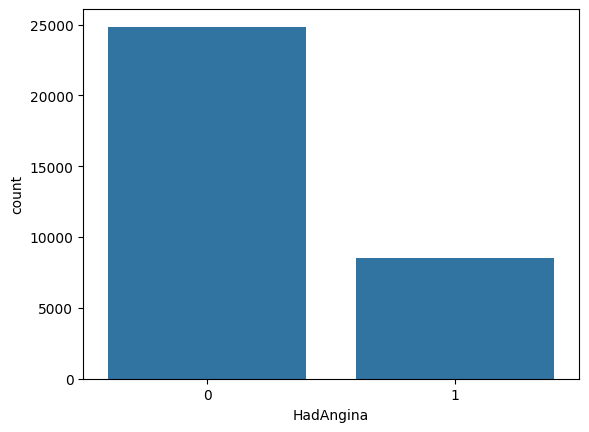

In [ ]:
#Countplot
sns.countplot(x=X_train_undersampled['HadAngina'])

##Model development

# **Alireza Modiriyan**


# Scaling

In [ ]:
#Standard scaler
scaler = StandardScaler()

#Scale sets
scaler.fit(X_train_undersampled)
X_train_scaled = scaler.transform(X_train_undersampled)
X_test_scaled = scaler.transform(X_test)



# XGBoost Model

XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Create an instance of XGBClassifier
xgb_model = xgb.XGBClassifier()

# Train the model on the undersampled training data
xgb_model.fit(X_train_undersampled, Y_train_undersampled)
# predictions on the training set
y_train_pred = xgb_model.predict(X_train_undersampled)

# Evaluate performance on the training set
accuracy_train = accuracy_score(Y_train_undersampled, y_train_pred)
precision_train = precision_score(Y_train_undersampled, y_train_pred)
recall_train = recall_score(Y_train_undersampled, y_train_pred)
f1_train = f1_score(Y_train_undersampled, y_train_pred)

print("Performance on training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

# Print classification report for the training set
print("\nClassification Report on training set:")
print(classification_report(Y_train_undersampled, y_train_pred))

# Print confusion matrix for the training set
print("Confusion Matrix on training set:")
print(confusion_matrix(Y_train_undersampled, y_train_pred))

# predictions on the test set
y_test_pred = xgb_model.predict(X_test)

# Evaluate performance on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
precision_test = precision_score(Y_test, y_test_pred)
recall_test = recall_score(Y_test, y_test_pred)
f1_test = f1_score(Y_test, y_test_pred)

print("\nPerformance on test set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

# Print classification report for the test set
print("\nClassification Report on test set:")
print(classification_report(Y_test, y_test_pred))

# Print confusion matrix for the test set
print("Confusion Matrix on test set:")
print(confusion_matrix(Y_test, y_test_pred))

Performance on training set:
Accuracy: 0.8855807823638651
Precision: 0.8944658944658944
Recall: 0.8743185766488948
F1-score: 0.8842774916691912

Classification Report on training set:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     16693
           1       0.89      0.87      0.88     16693

    accuracy                           0.89     33386
   macro avg       0.89      0.89      0.89     33386
weighted avg       0.89      0.89      0.89     33386

Confusion Matrix on training set:
[[14971  1722]
 [ 2098 14595]]

Performance on test set:
Accuracy: 0.7957179276232264
Precision: 0.1886267288999272
Recall: 0.7908438061041293
F1-score: 0.3046018739411541

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     92887
           1       0.19      0.79      0.30      5570

    accuracy                           0.80     98457
   macro avg       0.59      

XGBoost model using Scaled sets:

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Create an instance of XGBClassifier
xgb_model = xgb.XGBClassifier()

# Train the model on the undersampled training data
xgb_model.fit(X_train_scaled, Y_train_undersampled)
# predictions on the training set
y_train_pred = xgb_model.predict(X_train_scaled)

# Evaluate performance on the training set
accuracy_train = accuracy_score(Y_train_undersampled, y_train_pred)
precision_train = precision_score(Y_train_undersampled, y_train_pred)
recall_train = recall_score(Y_train_undersampled, y_train_pred)
f1_train = f1_score(Y_train_undersampled, y_train_pred)

print("Performance on training set after scaling:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

# Print classification report for the training set
print("\nClassification Report on training set:")
print(classification_report(Y_train_undersampled, y_train_pred))

# Print confusion matrix for the training set
print("Confusion Matrix on training set:")
print(confusion_matrix(Y_train_undersampled, y_train_pred))

# predictions using the test set
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluate performance on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
precision_test = precision_score(Y_test, y_test_pred)
recall_test = recall_score(Y_test, y_test_pred)
f1_test = f1_score(Y_test, y_test_pred)

print("\nPerformance on test set after scaling:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

# Print classification report for the test set
print("\nClassification Report on test set:")
print(classification_report(Y_test, y_test_pred))

# Print confusion matrix for the test set
print("Confusion Matrix on test set:")
print(confusion_matrix(Y_test, y_test_pred))


Performance on training set after scaling:
Accuracy: 0.8855807823638651
Precision: 0.8944658944658944
Recall: 0.8743185766488948
F1-score: 0.8842774916691912

Classification Report on training set:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     16693
           1       0.89      0.87      0.88     16693

    accuracy                           0.89     33386
   macro avg       0.89      0.89      0.89     33386
weighted avg       0.89      0.89      0.89     33386

Confusion Matrix on training set:
[[14971  1722]
 [ 2098 14595]]

Performance on test set after scaling:
Accuracy: 0.7957179276232264
Precision: 0.1886267288999272
Recall: 0.7908438061041293
F1-score: 0.3046018739411541

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     92887
           1       0.19      0.79      0.30      5570

    accuracy                           0.80     98457
 

# Hyperparameter tuning:

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define hyperparameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Create XGBoost
xgb_model = xgb.XGBClassifier(**params)

# Train the model
xgb_model.fit(X_train_undersampled, Y_train_undersampled)

# predict using the test set
y_pred = xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print evaluation metrics
print("Performance on test set with hyperparameters:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report
print("\nClassification Report on test set:")
print(classification_report(Y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix on test set:")
print(confusion_matrix(Y_test, y_pred))



Performance on test set with hyperparameters:
Accuracy: 0.8067074966736748
Precision: 0.19819739025155822
Recall: 0.7935368043087971
F1-score: 0.31717555882458465

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     92887
           1       0.20      0.79      0.32      5570

    accuracy                           0.81     98457
   macro avg       0.59      0.80      0.60     98457
weighted avg       0.94      0.81      0.86     98457

Confusion Matrix on test set:
[[75006 17881]
 [ 1150  4420]]


Grid search for best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_undersampled, Y_train_undersampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train_undersampled, Y_train_undersampled)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print evaluation metrics
print("\nPerformance on test set with best hyperparameters:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report
print("\nClassification Report on test set:")
print(classification_report(Y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix on test set:")
print(confusion_matrix(Y_test, y_pred))


KeyboardInterrupt: 

Model with best hyperparameters

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define XGBoost with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=0.8
)

# Train XGBoost model with best the hyperparameters
best_xgb_classifier.fit(X_train_undersampled, Y_train_undersampled)

# Predict on training set
y_train_pred = best_xgb_classifier.predict(X_train_undersampled)
print("Accuracy on training set:", accuracy_score(Y_train_undersampled, y_train_pred))
print("Classification report on training set:")
print(classification_report(Y_train_undersampled, y_train_pred))
print("Confusion matrix on training set:")
print(confusion_matrix(Y_train_undersampled, y_train_pred))

# Predict on test set
y_test_pred = best_xgb_classifier.predict(X_test)
print("\nAccuracy on test set:", accuracy_score(Y_test, y_test_pred))
print("Classification report on test set:")
print(classification_report(Y_test, y_test_pred))
print("Confusion matrix on test set:")
print(confusion_matrix(Y_test, y_test_pred))

Accuracy on training set: 0.8122865871922362
Classification report on training set:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     16693
           1       0.82      0.81      0.81     16693

    accuracy                           0.81     33386
   macro avg       0.81      0.81      0.81     33386
weighted avg       0.81      0.81      0.81     33386

Confusion matrix on training set:
[[13675  3018]
 [ 3249 13444]]

Accuracy on test set: 0.8056715114212296
Classification report on test set:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     92887
           1       0.20      0.80      0.32      5570

    accuracy                           0.81     98457
   macro avg       0.59      0.80      0.60     98457
weighted avg       0.94      0.81      0.85     98457

Confusion matrix on test set:
[[74883 18004]
 [ 1129  4441]]


# Feature management

In [ ]:
X_train_FE = copy.deepcopy(X_train_undersampled)
X_test_FE = copy.deepcopy(X_test)
X_train_FE = pd.DataFrame(X_train_FE, columns=['State', 'Gender', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'])

X_test_FE = pd.DataFrame(X_test_FE, columns=['State', 'Gender', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'])

# Calculate the correlation
correlation_matrix = df_correlation.corr()

# Select the correlation values for the target variable
target_correlation = correlation_matrix['HadHeartDisease']

# Define a threshold for low correlation
threshold = 0.06

# Identify features with correlation below the threshold
low_correlation_features = target_correlation[abs(target_correlation) < threshold].index
# Print the columns with low correlation
print("Columns with low correlation:", low_correlation_features)

# Remove the low correlation features from X_train_FE and X_test_FE
X_train_FE_filtered = X_train_FE.drop(columns=low_correlation_features)
X_test_FE_filtered = X_test_FE.drop(columns=low_correlation_features)




Columns with low correlation: Index(['State', 'MentalHealthDays', 'SleepHours', 'HadAsthma', 'HadSkinCancer',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'ECigaretteUsage',
       'RaceEthnicityCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'HIVTesting', 'FluVaxLast12', 'TetanusLast10Tdap', 'HighRiskLastYear',
       'CovidPos'],
      dtype='object')


Model after feature engineering

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define XGBoost with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=0.8
)

# Train the model with the best hyperparameters
best_xgb_classifier.fit(X_train_FE_filtered, Y_train_undersampled)

# Predict on training set
y_train_pred = best_xgb_classifier.predict(X_train_FE_filtered)
print("Accuracy on training set:", accuracy_score(Y_train_undersampled, y_train_pred))
print("Classification report on training set with feature engineering: ")
print(classification_report(Y_train_undersampled, y_train_pred))
print("Confusion matrix on training set:")
print(confusion_matrix(Y_train_undersampled, y_train_pred))

# Predict on test set
y_test_pred = best_xgb_classifier.predict(X_test_FE_filtered)
print("\nAccuracy on test set:", accuracy_score(Y_test, y_test_pred))
print("Classification report on test set with feature engineering:")
print(classification_report(Y_test, y_test_pred))
print("Confusion matrix on test set:")
print(confusion_matrix(Y_test, y_test_pred))

Accuracy on training set: 0.8078535913257053
Classification report on training set with feature engineering: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     16693
           1       0.81      0.80      0.81     16693

    accuracy                           0.81     33386
   macro avg       0.81      0.81      0.81     33386
weighted avg       0.81      0.81      0.81     33386

Confusion matrix on training set:
[[13582  3111]
 [ 3304 13389]]

Accuracy on test set: 0.8039854962064658
Classification report on test set with feature engineering:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     92887
           1       0.20      0.80      0.32      5570

    accuracy                           0.80     98457
   macro avg       0.59      0.80      0.60     98457
weighted avg       0.94      0.80      0.85     98457

Confusion matrix on test set:
[[74715 18172]
 [ 1127  4443]]


# Cross Validation

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# Initialise XGBoost classifier
best_xgb_classifier = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=0.8
)

# Define number of splits for KFold and StratifiedKFold
n_splits = 5

# KFold cross-validation
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)
xgb_scores_kf = cross_val_score(best_xgb_classifier, X_train_FE_filtered, Y_train_undersampled, cv=kf)
print(f"KFold Cross-validation Mean Accuracy: {np.mean(xgb_scores_kf):.4f}")

# StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
xgb_scores_skf = cross_val_score(best_xgb_classifier, X_train_FE_filtered,Y_train_undersampled, cv=skf)
print(f"StratifiedKFold Cross-validation Mean Accuracy: {np.mean(xgb_scores_skf):.4f}")


KFold Cross-validation Mean Accuracy: 0.8007
StratifiedKFold Cross-validation Mean Accuracy: 0.8017


Finding the best model with grid search with the best precision score

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define hyperparameter grid
param_grid = {
    'max_depth': [3,4,5,6,7],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'n_estimators': [50, 100, 200,300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2,0.3]
}

# Create XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='precision')
grid_search.fit(X_train_undersampled, Y_train_undersampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train_undersampled, Y_train_undersampled)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print evaluation metrics
print("\nPerformance on test set with best hyperparameters:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report
print("\nClassification Report on test set:")
print(classification_report(Y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix on test set:")
print(confusion_matrix(Y_test, y_pred))
